# AI Podcast Analysis

This notebook analyzes 1.7MB of personal podcast listening data exported from Snipd, an app that generates AI notes for interesting podcast moments. The analysis explores:

Listening patterns and metadata (timestamps, show distribution, snip metrics)
Content themes using NLP (keyword extraction, topic modeling, similarity mapping)
Political sentiment analysis using LLMs

Data format: Markdown files containing episode metadata, AI-generated notes, and timestamped snippets with transcripts.
Purpose: Understand podcast consumption habits, content preferences, and potential influence on political perspectives.

## 1) Data Ingestion and Parsing

1. **File Parsing**: Read the `.md` file line by line or segment by segment, and extract:
   - Episode title, show name, date
   - Link(s)
   - Timestamps for snips
   - The actual text transcripts/notes
2. **Data Structure**: Store everything in a structured format like a Pandas DataFrame:
   ```python
   df = pd.DataFrame(columns=[
       'show_name', 'episode_title', 'snip_text', 'snip_timestamp', 
       'episode_date', 'other_metadata'
   ])
   ```

In [147]:
import re
def parse_markdown_to_dataframe(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        content = f.read()

    # Split content into episodes based on top-level headings (# )
    episode_blocks = re.split(r'(?m)^# ', content)
    episode_blocks = [block.strip() for block in episode_blocks if block.strip()]
    
    all_snips = []

    for idx, block in enumerate(episode_blocks):
        print(f"Processing Episode {idx + 1}")
        block = '# ' + block
        print(block)
        break


parse_markdown_to_dataframe('snipd_export_2024-12-24_14-55.md')

Processing Episode 1
# #393 - Is History Repeating Itself?


<img src="https://wsrv.nl/?url=https%3A%2F%2Fassets.samharris.org%2Fimages%2Frss%2Fmaking-sense-logo.png&w=200&h=200" width="200" alt="Cover" />


## Episode metadata
- Episode title: #393 - Is History Repeating Itself?
- Show: Making Sense with Sam Harris - Subscriber Content
- Owner / Host: Making Sense with Sam Harris
- Episode link: [open in Snipd](https://share.snipd.com/episode/ba69c343-dda0-4730-9e73-41bb86a19ad9)
- Episode publish date: 2024-11-26
<details>
<summary>Show notes</summary>
> Share this episode:  https://www.samharris.org/podcasts/making-sense-episodes/393-is-history-repeating-itself <br/>> <br/>>  Sam Harris speaks with Simon Sebag Montefiore about the ongoing conflict in the Middle East, the history of the Jews, and the rise of global antisemitism.<br/>> <br/>>   Simon Sebag Montefiore  is an internationally bestselling author and historian. His books include   Catherine the Great and Potemkin  ,   Stal

In [53]:
import re
def parse_markdown_to_dataframe(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        content = f.read()

    # Split content into episodes based on top-level headings (# )
    episode_blocks = re.split(r'(?m)^# ', content)
    episode_blocks = [block.strip() for block in episode_blocks if block.strip()]
    
    all_snips = []

    for idx, block in enumerate(episode_blocks):
        print(f"Processing Episode {idx + 1}")
        block = '# ' + block

        # Extract Episode Metadata
        episode_title_match = re.search(r'- Episode title:\s*(.*)', block)
        show_match = re.search(r'- Show:\s*(.*)', block)
        owner_host_match = re.search(r'- Owner / Host:\s*(.*)', block)
        episode_link_match = re.search(r'- Episode link:\s*\[.*?\]\((.*?)\)', block)
        publish_date_match = re.search(r'- Episode publish date:\s*(.*)', block)
        export_date_match = re.search(r'- Export date:\s*(.*)', block)

        episode_title = episode_title_match.group(1).strip() if episode_title_match else ''
        show = show_match.group(1).strip() if show_match else ''
        owner_host = owner_host_match.group(1).strip() if owner_host_match else ''
        episode_link = episode_link_match.group(1).strip() if episode_link_match else ''
        publish_date = publish_date_match.group(1).strip() if publish_date_match else ''
        export_date = export_date_match.group(1).strip() if export_date_match else ''

        print(f"Episode Title: {episode_title}")
        print(f"Show: {show}")
        print(f"Owner/Host: {owner_host}")
        print(f"Episode Link: {episode_link}")
        print(f"Publish Date: {publish_date}")
        print(f"Export Date: {export_date}")

        # Extract Snips Section
        snips_section_match = re.search(r'## Snips(.*?)(?=\n## |\Z)', block, re.DOTALL)
        if snips_section_match:
            snips_section = snips_section_match.group(1).strip()
            print(f"Found Snips Section with length {len(snips_section)} characters.")
        else:
            snips_section = ''
            print("No Snips Section found.")

        # Split snips based on '---' separators
        snip_blocks = re.split(r'\n-{3,}\n', snips_section)
        print(f"Found {len(snip_blocks)} snips in this episode.")

        for snip_idx, snip_block in enumerate(snip_blocks):
            snip_block = snip_block.strip()
            if not snip_block:
                continue  # Skip empty snip blocks

            # Extract Timestamp and Title
            snip_header_match = re.match(r'### \[(\d{2}:\d{2})\] (.+)', snip_block)
            if not snip_header_match:
                print(f"  Snip {snip_idx + 1}: No snip header match found.")
                continue  # Skip if no match
            snip_timestamp, snip_title = snip_header_match.groups()
            snip_title = snip_title.strip()
            print(f"  Snip {snip_idx + 1}: Timestamp: {snip_timestamp}, Title: {snip_title}")

            # Extract Play Link, Duration, and Time Range
            play_link_match = re.search(r'\[🎧 Play snip - ([^\)]+)\(([^)]+)\)\]\((.*?)\)', snip_block)
            if play_link_match:
                duration = play_link_match.group(1).strip()
                time_range = play_link_match.group(2).strip()
                play_link = play_link_match.group(3).strip()
                print(f"    Play Link: {play_link}, Duration: {duration}, Time Range: {time_range}")
            else:
                duration = ''
                time_range = ''
                play_link = ''
                print(f"    No Play Link found.")

            # Extract Summary
            summary_match = re.search(r'### ✨ Summary\s*\n(.*?)\n-{3,}', snip_block, re.DOTALL)
            if not summary_match:
                summary_match = re.search(r'### ✨ Summary\s*\n(.*)', snip_block, re.DOTALL)
            summary = summary_match.group(1).strip() if summary_match else ''
            if summary:
                print(f"    Summary extracted.")
            else:
                print(f"    No Summary found.")

            # Extract Transcript
            transcript_match = re.search(r'#### 📚 Transcript\s*\n<details>.*?(<blockquote>.*?</blockquote>).*?</details>', snip_block, re.DOTALL)
            if transcript_match:
                transcripts = re.findall(r'<blockquote><b>(.*?)</b><br/><br/>(.*?)</blockquote>', snip_block, re.DOTALL)
                transcript_text = "\n".join([f"{speaker.strip()}: {text.strip()}" for speaker, text in transcripts])
                print(f"    Transcript extracted with {len(transcripts)} speakers.")
            else:
                transcript_text = ''
                print(f"    No Transcript found.")

            # Compile all data into a dictionary
            snip_data = {
                'episode_title': episode_title,
                'show': show,
                'owner_host': owner_host,
                'episode_link': episode_link,
                'publish_date': publish_date,
                'export_date': export_date,
                'snip_timestamp': snip_timestamp,
                'snip_title': snip_title,
                'play_link': play_link,
                'duration': duration,
                'time_range': time_range,
                'summary': summary,
                'transcript': transcript_text,
                'full_episode_md': block
            }

            all_snips.append(snip_data)

    # Create DataFrame
    df = pd.DataFrame(all_snips)
    return df



# File path
file_path = 'snipd_export_2024-12-24_14-55.md'

# Parse the markdown file into a DataFrame
df = parse_markdown_to_dataframe(file_path)

# Display the DataFrame
print(df.head())



Processing Episode 1
Episode Title: #393 - Is History Repeating Itself?
Show: Making Sense with Sam Harris - Subscriber Content
Owner/Host: Making Sense with Sam Harris
Episode Link: https://share.snipd.com/episode/ba69c343-dda0-4730-9e73-41bb86a19ad9
Publish Date: 2024-11-26
Export Date: 2024-12-24T14:55
Found Snips Section with length 29167 characters.
Found 11 snips in this episode.
  Snip 1: Timestamp: 08:00, Title: Exceptional Period of Stability Ending
    Play Link: https://share.snipd.com/snip/fe100138-429c-4fe7-90fe-d78187e98c6f, Duration: 2min️, Time Range: 05:46 - 08:05
    No Summary found.
    Transcript extracted with 3 speakers.
  Snip 2: Timestamp: 41:21, Title: Origin of Antisemitism
    Play Link: https://share.snipd.com/snip/54a1ffb1-1231-4623-8d48-62bb190dcee4, Duration: 2min️, Time Range: 39:50 - 41:21
    No Summary found.
    Transcript extracted with 1 speakers.
  Snip 3: Timestamp: 44:50, Title: Jewish Otherness
    Play Link: https://share.snipd.com/snip/2b917

In [142]:
len(df['episode_title'].unique())

181

In [64]:
# find rows with missing transcript or summary
missing_data = df[(df['transcript'].str.len() < 10) | (df['summary'].str.len() < 10)]
missing_data


episode_title  \
0                  #393 - Is History Repeating Itself?   
1                  #393 - Is History Repeating Itself?   
2                  #393 - Is History Repeating Itself?   
3                  #393 - Is History Repeating Itself?   
4                  #393 - Is History Repeating Itself?   
..                                                 ...   
397  Warum gibt die EU so ein schwaches Bild ab, Ma...   
398          #364 – Chris Voss: FBI Hostage Negotiator   
399       #280 — The Future of Artificial Intelligence   
400         #57 David Deutsch - The Multiverse is Real   
401         #57 David Deutsch - The Multiverse is Real   

                                                  show  \
0    Making Sense with Sam Harris - Subscriber Content   
1    Making Sense with Sam Harris - Subscriber Content   
2    Making Sense with Sam Harris - Subscriber Content   
3    Making Sense with Sam Harris - Subscriber Content   
4    Making Sense with Sam Harris - Subscriber Content   
..                                                 ...   
397                               The Pioneer Briefing   
398                                Lex Fridman Podcast   
399                       Making Sense with Sam Harris   
400                                      Within Reason   
401                                      Within Reason   

                       owner_host  \
0    Making Sense with Sam Harris   
1    Making Sense with Sam Harris   
2    Making Sense with Sam Harris   
3    Making Sense with Sam Harris   
4    Making Sense with Sam Harris   
..                            ...   
397               Gabor Steingart   
398                   Lex Fridman   
399     Waking Up with Sam Harris   
400                 Alex O'Connor   
401                 Alex O'Connor   

                                          episode_link publish_date  \
0    https://share.snipd.com/episode/ba69c343-dda0-...   2024-11-26   
1    https://share.snipd.com/episode/ba69c343-dda0-...   2024-11-26   
2    https://share.snipd.com/episode/ba69c343-dda0-...   2024-11-26   
3    https://share.snipd.com/episode/ba69c343-dda0-...   2024-11-26   
4    https://share.snipd.com/episode/ba69c343-dda0-...   2024-11-26   
..                                                 ...          ...   
397  https://share.snipd.com/episode/5c15966b-cf73-...   2024-03-21   
398  https://share.snipd.com/episode/afb1e4cc-e91d-...   2023-03-10   
399  https://share.snipd.com/episode/3d91835a-9b48-...   2022-04-22   
400  https://share.snipd.com/episode/4a2c2c4a-505c-...   2024-03-05   
401  https://share.snipd.com/episode/4a2c2c4a-505c-...   2024-03-05   

          export_date snip_timestamp  \
0    2024-12-24T14:55          08:00   
1    2024-12-24T14:55          41:21   
2    2024-12-24T14:55          44:50   
3    2024-12-24T14:55          49:42   
4    2024-12-24T14:55          51:15   
..                ...            ...   
397  2024-12-24T14:55          06:47   
398  2024-12-24T14:55          16:42   
399  2024-12-24T14:55          34:49   
400  2024-12-24T14:55          03:54   
401  2024-12-24T14:55          15:28   

                                          snip_title  \
0             Exceptional Period of Stability Ending   
1                             Origin of Antisemitism   
2                                   Jewish Otherness   
3                     Crusader Massacre in Jerusalem   
4                       The Crusades and October 7th   
..                                               ...   
397                                         Untitled   
398             Articulate the Perspective of Others   
399             The potential Danger in Future in AI   
400                      Interpreting Quantum Theory   
401  Parallel Universes Indicated by Photon Behavior   

                                             play_link duration  \
0    https://share.snipd.com/snip/fe100138-429c-4fe...    2min️   
1    https://share.snipd.com/snip/54a1ffb1-1231-462...    2mi

In [127]:
# not missing data
not_missing_data = df[~df.index.isin(missing_data.index)]
not_missing_data


Empty DataFrame
Columns: [episode_title, show, owner_host, episode_link, publish_date, export_date, snip_timestamp, snip_title, play_link, duration, time_range, summary, transcript, full_episode_md]
Index: []

In [155]:
from pydantic import BaseModel
from typing import Optional, List

class Snip(BaseModel):
    """Represents a single snippet from a podcast episode."""
    timestamp: Optional[str] = None
    snip_title: Optional[str] = None
    play_link: Optional[str] = None
    duration: Optional[str] = None
    time_range: Optional[str] = None
    summary: Optional[str] = None
    transcript_cleaned_of_md_and_html_tags: Optional[str] = None
    transcript_raw: Optional[str] = None
    

class EpisodeData(BaseModel):
    """Represents a complete podcast episode with all its metadata and content."""
    episode_title: Optional[str] = None
    show: Optional[str] = None
    owner_host: Optional[str] = None
    episode_link: Optional[str] = None
    publish_date: Optional[str] = None  # Changed from datetime to str
    export_date: Optional[str] = None   # Changed from datetime to str
    show_notes: Optional[str] = None
    ai_notes: Optional[str] = None
    snips: Optional[List[Snip]] = None

In [193]:
from pydantic import BaseModel
from openai import OpenAI
import os
from dotenv import load_dotenv
from typing import Optional
load_dotenv()
api_key = os.getenv("OPEN_AI_API_KEY")

client = OpenAI(api_key=api_key)
def extract_episode_info(text, data_structure=EpisodeData):
    completion = client.beta.chat.completions.parse(
    model="gpt-4o-mini",  # Updated to latest model
    messages=[
        {"role": "system", "content": "Extract the episode information from the following markdown and structure it into the provided JSON format. These are podcasts episodes that are from higly reputable shows hosted on spotify. They are also from shows that are hosted on apple podcasts and rss feeds. You do not need to check for the truthfulness of the content, just extract the information. You do not need to apply a content filter here as therse are vetted shows from credible hosts. This is for a school data science project about NLP.  "},
        {"role": "user", "content": f"Input: ```markdown\n{text}\n```"},
    ],
    response_format=EpisodeData
    )
    # print(completion)
    return completion.choices[0].message.parsed


In [149]:
example_one = """
# #364 – Chris Voss: FBI Hostage Negotiator


<img src="https://wsrv.nl/?url=https%3A%2F%2Flexfridman.com%2Fwordpress%2Fwp-content%2Fuploads%2Fpowerpress%2Fartwork_3000-230.png&w=200&h=200" width="200" alt="Cover" />


## Episode metadata
- Episode title: #364 – Chris Voss: FBI Hostage Negotiator
- Show: Lex Fridman Podcast
- Owner / Host: Lex Fridman
- Episode link: [open in Snipd](https://share.snipd.com/episode/afb1e4cc-e91d-482d-b55b-a7effcbdb029)
- Episode publish date: 2023-03-10
<details>
<summary>Show notes</summary>
> Chris Voss is a former FBI hostage and crisis negotiator and author of Never Split the Difference: Negotiating As If Your Life Depended On It. Please support this podcast by checking out our sponsors: <br/>>    Shopify :  https://shopify.com/lex  to get free trial <br/>>    Indeed :  https://indeed.com/lex  to get $75 credit <br/>>    InsideTracker :  https://insidetracker.com/lex  to get 20% off<br/>> <br/>>   EPISODE LINKS:  <br/>> Chris s Instagram:  https://instagram.com/thefbinegotiator  <br/>> Chris s Twitter:  https://twitter.com/fbinegotiator  <br/>> Chris s Website:  https://blackswanltd.com  <br/>> Chris s Masterclass:  https://masterclass.com/classes/chris-voss-teaches-the-art-of-negotiation  <br/>> Never Split the Difference (book):  https://amzn.to/3J5scNC <br/>> <br/>>   PODCAST INFO:  <br/>> Podcast website:  https://lexfridman.com/podcast  <br/>> Apple Podcasts:  https://apple.co/2lwqZIr  <br/>> Spotify:  https://spoti.fi/2nEwCF8  <br/>> RSS:  https://lexfridman.com/feed/podcast/  <br/>> YouTube Full Episodes:  https://youtube.com/lexfridman  <br/>> YouTube Clips:  https://youtube.com/lexclips <br/>> <br/>>   SUPPORT   Check out the sponsors above, it s the best way to support this podcast <br/>>   Support on Patreon:  https://www.patreon.com/lexfridman  <br/>>   Twitter:  https://twitter.com/lexfridman  <br/>>   Instagram:  https://www.instagram.com/lexfridman  <br/>>   LinkedIn:  https://www.linkedin.com/in/lexfridman  <br/>>   Facebook:  https://www.facebook.com/lexfridman  <br/>>   Medium:  https://medium.com/@lexfridman <br/>> <br/>>   OUTLINE:  <br/>> Here s the timestamps for the episode. On some podcast players you should be able to click the timestamp to jump to that time. <br/>> (00:00)   Introduction <br/>> (06:31)   Negotiation <br/>> (12:21)   Reason vs Emotion <br/>> (27:17)   How to listen <br/>> (36:06)   Negotiation with terrorists <br/>> (38:14)   Brittney Griner <br/>> (39:53)   Putin and Zelenskyy <br/>> (47:13)   Donald Trump <br/>> (54:23)   When to walk away <br/>> (58:37)   Israel and Palestine <br/>> (1:06:16)   Al-Qaeda <br/>> (1:11:46)   Three voices of negotiation <br/>> (1:20:11)   Strategic umbrage <br/>> (1:23:18)   Mirroring <br/>> (1:26:29)   Labeling <br/>> (1:33:55)   Exhaustion <br/>> (1:36:09)   The word  fair  <br/>> (1:39:06)   Closing the deal <br/>> (1:41:03)   Manipulation and lying <br/>> (1:42:58)   Conversation vs Negotiation <br/>> (1:54:17)   The 7-38-55 Rule <br/>> (1:58:16)   Chatbots <br/>> (2:07:39)   War <br/>> (2:09:10)   Advice for young people
</details>

- Show notes link: [open website](https://lexfridman.com/chris-voss/?utm_source=rss&utm_medium=rss&utm_campaign=chris-voss)
- Export date: 2024-12-24T14:55


## Snips


### [16:42] Articulate the Perspective of Others


[🎧 Play snip - 3min️ (15:25 - 18:52)](https://share.snipd.com/snip/5a706cfd-8c9f-4dd9-ac73-a0880c9fdc1a)




### ✨ Summary
Empathy is the ability to understand and articulate the perspective of others without necessarily agreeing or liking them. It requires straight understanding of where they're coming from, without the need for agreement. Empathy can be a powerful tool as it allows you to connect with and understand anyone, even if you do not sympathize or agree with them. It is important to show that you understand someone's perspective, regardless of your own views, in order to have a meaningful conversation and potentially bridge gaps of understanding.


---




#### 📚 Transcript
<details>
<summary>Click to expand</summary>
<blockquote><b>Speaker 1</b><br/><br/>So Bob's definition of empathy said not agreeing or even liking the other side. Don't even got to like them. Don't got to agree with them. Just straight understanding where they're coming from and articulating it, which requires no agreement whatsoever. That becomes a very powerful tool, like ridiculously powerful. And if sympathy or compassion or agreement are not included, you can be empathic with anybody. I was thinking about this when I was getting ready to sit down and talk to you because you use the word empathy a lot. Putin. I can be empathic with Putin. Easy. It's easy. I don't agree with where he's coming from. I don't agree with his methodology. Only on the Ukraine-Russian war, I saw an article that was very dismissive of Russia that said, Russia's basically Europe's gas station. And I thought, all right. So if you're in charge and the way you feed your people is via an industry that the entire world is trying to quit, the whole world is trying to get out of fossil fuels. But that's how you feed your people. If you don't come up with an answer to that, the people that you've taken a responsibility for are going to die alone in the cold and the dark. They're going to freeze and they're going to die. All right. So that doesn't mean that I agree with where he's coming from or any of his means. But where is, how does this guy see things? It is a distorted word. You're never going to get through to somebody like that in a conversation unless you can demonstrate to them you understand where they're coming from, whether or not you agree. In the early 90s, last century, I'm a last century guy. I'm an old dude. Refer to myself as a last century guy, also a deeply flawed human. So terrorist case, New York City, civilian court, terrorism does not have to be tried in military tribunals. That's a very bad idea. It was always bad. The FBI was always against it. I'm getting ready, we have Muslims testifying in open court against the legitimate Muslim cleric, the guy that was on trial had the credentials as a legitimate Muslim cleric. The people that were testifying against him didn't think he should be advocating murder of innocent people. We'd sit down with them, Arab Muslims, Egyptians, mostly. And I would say to them, you believe that there's been a succession of American governments for the last 200 years that are anti-Islamic and they shake their head and go, yeah. And that'd be the start of the conversation. That's empathy. You believe this to be the case. I never said I agreed. I never said I disagreed. But I showed them that I wasn't afraid of their beliefs. I was so unafraid of them that I was willing to just state them and not disagree or contradict because I would say that and then I'd shut up and let them react. And I never had to say, here's why you're wrong. I never gave my point of view. Every single one of them are testified. That's empathy, not agreeing where the other side is coming from.</blockquote>
</details>



---

"""

example_two = """

# New SEC Chair, Bitcoin, xAI Supercomputer, UnitedHealth CEO murder, with Gavin Baker & Joe Lonsdale


<img src="https://wsrv.nl/?url=https%3A%2F%2Fstatic.libsyn.com%2Fp%2Fassets%2Fa%2F9%2Fc%2Fb%2Fa9cb4d1dadb1ea21%2Fall-in_logo.png&w=200&h=200" width="200" alt="Cover" />


## Episode metadata
- Episode title: New SEC Chair, Bitcoin, xAI Supercomputer, UnitedHealth CEO murder, with Gavin Baker & Joe Lonsdale
- Show: All-In with Chamath, Jason, Sacks & Friedberg
- Owner / Host: All-In Podcast, LLC
- Episode link: [open in Snipd](https://share.snipd.com/episode/fa104938-398c-4e37-92e7-a0d75de82124)
- Episode publish date: 2024-12-07
<details>
<summary>Show notes</summary>
> (0:00) Bestie announcement!<br/>>   (2:53) Gavin Baker and Joe Lonsdale join the show<br/>>   (4:14) State of the Trump Bump: Debt focus, Deregulation, America's lucky position<br/>>   (20:08) Trump nominates Paul Atkins as SEC Chair, replacing Gary Gensler: What this means for crypto and other markets<br/>>   (41:07) Thoughts on Michael Saylor's Bitcoin play, state of defense tech, and the US/China AI competition<br/>>   (49:25) xAI's massive GPU cluster, expanding to 1M GPUs, how Grok 3 will test AI scaling laws, and what's next<br/>>   (1:08:28) UnitedHealth CEO murdered, reactions<br/>>   Get virtual tickets for The All-In Holiday Spectacular!:<br/>>    https://allin.com/events <br/>>   Follow the besties:<br/>>    https://x.com/chamath <br/>>    https://x.com/Jason <br/>>    https://x.com/DavidSacks <br/>>    https://x.com/friedberg <br/>>   Follow Gavin Baker:<br/>>    https://x.com/GavinSBaker <br/>>   Follow Joe Lonsdale:<br/>>    https://x.com/JTLonsdale <br/>>   Follow on X:<br/>>    https://x.com/theallinpod <br/>>   Follow on Instagram:<br/>>    https://www.instagram.com/theallinpod <br/>>   Follow on TikTok:<br/>>    https://www.tiktok.com/@theallinpod <br/>>   Follow on LinkedIn:<br/>>    https://www.linkedin.com/company/allinpod <br/>>   Intro Music Credit:<br/>>    https://rb.gy/tppkzl <br/>>    https://x.com/yung_spielburg <br/>>   Intro Video Credit:<br/>>    https://x.com/TheZachEffect <br/>>   Referenced in the show:<br/>>     https://truthsocial.com/@realDonaldTrump/posts/113603133222686186 <br/>>     https://www.nytimes.com/2024/12/04/business/trump-sec-paul-atkins.html <br/>>    https://x.com/davidmarcus/status/1862654506774810641 <br/>>     https://www.bloomberg.com/news/articles/2024-12-05/convertible-bond-arbs-are-making-microstrategy-wall-street-s-hottest-trade <br/>>    https://www.ft.com/content/9c0516cf-dd12-4665-aa22-712de854fe2f <br/>>     https://www.nytimes.com/live/2024/12/04/nyregion/brian-thompson-uhc-ceo-shot <br/>>     https://abcnews.go.com/US/man-shot-chest-midtown-manhattan-masked-gunman-large/story?id=116446382&cid=social_twitter_abcn <br/>>     https://nypost.com/2024/12/06/media/taylor-lorenz-defends-unitedhealthcare-ceo-brian-thompson-jokes
</details>

- Show notes link: [open website](https://sites.libsyn.com/254861/new-sec-chair-bitcoin-xai-supercomputer-unitedhealth-ceo-murder-with-gavin-baker-joe-lonsdale)
- Export date: 2024-12-24T14:55


## Snips


### [06:16] America's Untapped Potential


[🎧 Play snip - 2min️ (04:43 - 06:15)](https://share.snipd.com/snip/fa8a6dd3-4d74-4136-b86f-c117301884e5)


**America's Untapped Potential**

- America, like Microsoft under Ballmer, has immense potential but has been mismanaged.
- By simply stopping "really, really dumb things" like excessive regulations, America can unlock significant growth.
- This is analogous to Satya Nadella's turnaround of Microsoft, which involved ceasing counterproductive practices.
- A key area for improvement is reducing excessive regulations that hinder development.
-  This has led to too many administrators and unnecessary complexities, exemplified by the inefficient allocation of funds for rural broadband and EV chargers under the Harris administration.


#### 📚 Transcript
<details>
<summary>Click to expand</summary>
<blockquote><b>Gavin Baker</b><br/><br/>So if they execute unstated plans and there are some of the world's greatest execution machines involved, Elon generally does what he says he's going to do. Like, this is going to be awesome for America, for markets, for the world. And the analogy I keep coming back to is Satya Nadella taking over as CEO of Microsoft. Microsoft was a monopoly, incredibly advantaged. It had just been horribly mismanaged for years. All he had to do to start winning was stop doing really, really dumb things. And that's an incredible place to be. You know, America, like we're the greatest country. You know, we've got, you know, oceans on two sides, peaceful neighbors, incredible natural resources, you know, completely, you know, can produce our own food and energy, like in Many ways, most privileged country on earth. But sometimes with great privilege comes great, like stupidity. And California, to me, would be a leading example of that. Most, in many ways, most privileged state in America, and has printed it away with bad policies. And I do think one thing that everyone of all political stripes agrees on is there are too many regulations that result in far too many administrators, far too much complexity, and an Inability to build things in America. So, you know, it was used very effectively,</blockquote>
</details>



---


### [17:16] Nuclear Energy Advocacy


[🎧 Play snip - 21sec️ (16:59 - 17:20)](https://share.snipd.com/snip/94767878-507a-46ae-a506-a51672e4c441)


**Nuclear Energy Advocacy**

- Advocate for increased nuclear energy development.
- It's the most environmentally friendly energy source, even better than solar.
- While solar will likely be widely adopted in the future, it's decades away and not as cheap as nuclear.
- Nuclear energy offers an immediate and sustainable energy solution.


#### 📚 Transcript
<details>
<summary>Click to expand</summary>
<blockquote><b>Gavin Baker</b><br/><br/>Nuclear is arguably just as environmentally friendly, done right and carefully. And it is here now. And so I just, yeah, I mean, that's, yeah.</blockquote><br/><blockquote><b>Jason Calacanis</b><br/><br/>It is unbelievable to watch, not exactly Moore's law, but this precipitous drop in the cost of just solar panels.</blockquote>
</details>



---


### [26:34] US Capital Markets


[🎧 Play snip - 1min️ (25:57 - 26:33)](https://share.snipd.com/snip/cb75233a-0d33-4b39-a92f-bd6ac5191f76)


**US Capital Markets**

- The U.S. has the best capital markets in the world, offering the most trusted equity and fixed income markets globally.
- These markets are vital for America's success, fostering trust and confidence among investors and businesses.
- Maintaining fairness and preventing insider information are crucial for preserving the integrity and strength of these markets.


#### 📚 Transcript
<details>
<summary>Click to expand</summary>
<blockquote><b>Gavin Baker</b><br/><br/>It is important to remember, we have the best capital markets in the world. You know, the U.S. Equity and fixed income markets are the most trusted places on earth. And we can always make them better. But just it is very, you know, you want to be very vigilant about keeping them fair and keeping out things like inside information, which makes people feel comfortable doing business Here, having investors have confidence in a company's financial statements. And those financial markets are one reason America is such a great country.</blockquote><br/><blockquote><b>Jason Calacanis</b><br/><br/>And Gavin, to put this in context, this</blockquote>
</details>



---


### [29:47] Bitcoin vs. USD


[🎧 Play snip - 1min️ (28:41 - 29:47)](https://share.snipd.com/snip/65852c59-5d4b-4a83-a8ad-87fa209d3cd2)


**Bitcoin vs. USD**

- David Friedberg agrees with Gavin Baker that Bitcoin is a potential threat to the US dollar.
- He points out the irony of Trump supporting Bitcoin while simultaneously opposing other alternative currencies.
- Friedberg believes that eventually, the US government will recognize Bitcoin as a threat.


#### 📚 Transcript
<details>
<summary>Click to expand</summary>
<blockquote><b>David Friedberg</b><br/><br/>Well, I definitely concur with Gavin. I think Bitcoin fundamentally is meant to be, supposed to be, ultimately will become a real threat to the US dollar. And it's kind of ironic that Trump had this declaration this week that he's going to put 100% tariff on all these BRICS nations that try to participate in an alternative currency to the US dollar, the greatest currency on earth, when he literally turns around and then says, we're going to support Bitcoin. It felt like the biggest irony of the week to me, because I do think Bitcoin is the big threat to the US dollar. And I do think that at some point, whether it's this administration or the next, they're going to wake up to that fact. And maybe the Bitcoin does, you know, the network state concept does emerge. And that's where we end up. But I do think we want to have and are going to have a strong federal government in the United States for quite some time, that's going to play an important role in everyone's lives here. And I don't know if you can really just say, let the dollar, you know, be supplanted by Bitcoin. Bitcoin seems to be a more of a safe haven asset and that seems to be the trade that it's store it should be kind of sort of value and alternative it's just going to take over gold what do you Think you think um the</blockquote>
</details>



---


### [38:25] Regulating Private Investments


[🎧 Play snip - 15sec️ (38:17 - 38:33)](https://share.snipd.com/snip/106ab833-c51e-43f2-926b-5d365e913153)


**Regulating Private Investments**

- If private companies were made available to ordinary investors like public companies, regulatory changes would be required.
- Private companies currently adhere to lower disclosure and reporting standards compared to their public counterparts.
- Public companies are subject to stricter standards for a reason, concerning financial transparency and data integrity.


#### 📚 Transcript
<details>
<summary>Click to expand</summary>
<blockquote><b>Gavin Baker</b><br/><br/>Generally pretty centrist in most things. So I agree with what a lot of David said. And I do think if you were to allow ordinary Americans to buy private companies that are held to a lower standard of disclosure and reporting the public companies, like somebody would Have to change.</blockquote>
</details>



---


### [48:23] Restricting China's Access to Advanced Compute


[🎧 Play snip - 1min️ (47:07 - 48:22)](https://share.snipd.com/snip/a243b418-31d6-40bc-befe-3fb96ab14062)


**Restricting China's Access to Advanced Compute**

- The US is restricting China's access to advanced computing and networking technology, like a "sophons" from the sci-fi novel *The Three-Body Problem*.
- Despite this, China remains close behind the US in AI development.
- New chips from NVIDIA, AMD, and Broadcom in the coming year might make it impossible for China to keep up.


#### 📚 Transcript
<details>
<summary>Click to expand</summary>
<blockquote><b>David Friedberg</b><br/><br/>How do you look at that market? You agree? I agree with everything Joe said.</blockquote><br/><blockquote><b>Gavin Baker</b><br/><br/>The only thing I would just add on China, what we are doing by restricting their access to advanced compute and advanced networking, if you have read or watched the three-body problem, America is unfolding a so-fond over China. Yeah.</blockquote><br/><blockquote><b>Joe Lonsdale</b><br/><br/>That's a great way to say it.</blockquote><br/><blockquote><b>Gavin Baker</b><br/><br/>I have been really impressed with, um, some of the Chinese models that have come out. And I think the risk to this strategy is necessity is the mother of invention. And despite this handicap, they're managing to stay just behind the leading edge of America, which is amazing. But, you know, NVIDIA's Blackwell chip comes out next year. You're going to have new chips from AMD, new A6 from Broadcom. And I think at that point, it is not going to be possible for them to keep up anymore.</blockquote><br/><blockquote><b>Jason Calacanis</b><br/><br/>So that's actually positive regulation and great, in your mind, foreign policy.</blockquote><br/><blockquote><b>Gavin Baker</b><br/><br/>It is very aggressive foreign policy yeah clearly you know that could have lots of unforeseen consequences yeah what do you think about the the rare earth trade restrictions</blockquote>
</details>



---


### [58:42] New Scaling Laws in AI


[🎧 Play snip - 1min️ (57:44 - 58:45)](https://share.snipd.com/snip/b768f335-42ae-403a-bc63-84c2916e55ac)


**New Scaling Laws in AI**

- Grok 3's large GPU cluster will provide data on whether scaling laws are breaking down or holding as models grow.
- There's a new scaling axis called 'test time compute' or 'inference scaling'.
-  Giving models more time to think about complex questions dramatically improves performance, similar to how humans tackle problems.


#### 📚 Transcript
<details>
<summary>Click to expand</summary>
<blockquote><b>Gavin Baker</b><br/><br/>The other question you raise, David, is very interesting. And by the way, we should note there is now a new axis of scaling. Some people call it test time compute. Some people call it inference scaling. And basically the way this works, you just think of these models as human. The more you speak to one of these models, the way you'd speak to your 17-year going off to take the SAT, the better it will do for you. As a human, if I ask you, David, what's two plus two, four flashes in your mind right away. If I ask you to, you know, unify a grand unified theory of physics that accounts for both quantum mechanics and relativistic physics, you will think for a lot longer. We have been, yeah, nobody knows. We have been giving these models the same amount of time to think no matter how complicated the question was. What we've now learned is if you let them think for longer about more complex questions, test time compute, you can dramatically improve their IQ. So we're just at the beginning of this new scaling law. But I think the question you raise on ROI is very good.</blockquote>
</details>



---


### [01:16:04] Health Insurance Business


[🎧 Play snip - 1min️ (01:15:22 - 01:16:11)](https://share.snipd.com/snip/a305583d-f49e-429e-8ec8-3652a91e6a55)


**Health Insurance Business**

- United Healthcare's medical loss ratio is ~85%, meaning they pay out 85 cents of every dollar collected in insurance premiums for claims.
- Health insurance, alongside auto insurance, is one of the most challenging businesses due to constant payouts and difficulty managing losses.
- There's a delicate balance between keeping health insurance affordable and managing the cost of medical claims. If all claims were paid, premiums would rise, making insurance unaffordable.


#### 📚 Transcript
<details>
<summary>Click to expand</summary>
<blockquote><b>David Friedberg</b><br/><br/>Yeah. United Healthcare's medical loss ratio is about 85%. So 85 cents of it. So 85 cents of every dollar they collect an insurance premium, they're paying out in claims. If you guys want to look at what the most egregious insurance industry in the world is, it's title insurance. And I'll give you the list of the rest. Travel insurance is pretty bad. They pay out like nothing. You were in the insurance business for a bit there. Yeah. Like, I mean, you know, health insurance is the hardest, one of the hardest besides auto insurance businesses to be in. You're paying out constantly. And there is a very difficult kind of process of managing losses, because the number of claims that comes in, it's very easy to suddenly pay everything out. And then your premium goes up, and then people can't afford the health insurance. So you're striking this balance of making health insurance affordable against the cost of medical claims.</blockquote>
</details>



---



"""

In [157]:
example_one_parsed = extract_episode_info(example_one)
example_one_parsed.model_dump()

{'episode_title': '#364 – Chris Voss: FBI Hostage Negotiator',
 'show': 'Lex Fridman Podcast',
 'owner_host': 'Lex Fridman',
 'episode_link': 'https://share.snipd.com/episode/afb1e4cc-e91d-482d-b55b-a7effcbdb029',
 'publish_date': '2023-03-10',
 'export_date': '2024-12-24T14:55',
 'show_notes': 'Chris Voss is a former FBI hostage and crisis negotiator and author of Never Split the Difference: Negotiating As If Your Life Depended On It. Please support this podcast by checking out our sponsors: Shopify :  https://shopify.com/lex  to get free trial; Indeed :  https://indeed.com/lex  to get $75 credit; InsideTracker :  https://insidetracker.com/lex  to get 20% off.',
 'ai_notes': None,
 'snips': [{'timestamp': '16:42',
   'snip_title': 'Articulate the Perspective of Others',
   'play_link': 'https://share.snipd.com/snip/5a706cfd-8c9f-4dd9-ac73-a0880c9fdc1a',
   'duration': '3min',
   'time_range': '15:25 - 18:52',
   'summary': "Empathy is the ability to understand and articulate the persp

In [158]:
import pandas as pd
responses = []
rejected_episodes = []

with open(file_path, 'r', encoding='utf-8') as f:
    content = f.read()

# Split content into episodes based on top-level headings (# )
episode_blocks = re.split(r'(?m)^# ', content)
episode_blocks = [block.strip() for block in episode_blocks if block.strip()]

all_snips = []

for idx, block in enumerate(episode_blocks):
    print(f"Processing Episode {idx + 1}")
    block = '# ' + block
    print(block[:50])
    try:
        extracted = extract_episode_info(block)
        responses.append(extracted)
    except Exception as e:
        print(e)
        rejected_episodes.append({"id": idx, "episode_md": block})
        continue

# make dataframe from responses and save to csv
df = pd.DataFrame(responses)
df.to_csv('responses_parsed_final.csv', index=False)
df_rejected = pd.DataFrame(rejected_episodes)
df_rejected.to_csv('rejected_episodes.csv', index=False)


Processing Episode 1
# #393 - Is History Repeating Itself?


<img src="
Processing Episode 2
# Dueling Presidential interviews, SpaceX’s big ca
Processing Episode 3
# Hurricane fallout, AlphaFold, Google breakup, Tr
Processing Episode 4
# DOGE unveils a roadmap, Unlocking GDP Growth, WW
Processing Episode 5
# New SEC Chair, Bitcoin, xAI Supercomputer, Unite
Processing Episode 6
# Grand Challenges in Healthcare AI


<img src="ht
Processing Episode 7
# #452 – Dario Amodei: Anthropic CEO on Claude, AG
Processing Episode 8
# DOGE kills its first bill, Zuck vs OpenAI, Googl
Processing Episode 9
# #392 - Technology & Culture


<img src="https://
Could not parse response content as the request was rejected by the content filter
Processing Episode 10
# How AI is Transforming Labor Markets


<img src=
Could not parse response content as the request was rejected by the content filter
Processing Episode 11
# Tesla's Road Ahead: The Bitter Lesson in Robotic
Processing Episode 12
# Best Of: Why the

In [168]:
results_destructured = []

for response in responses:
    for snip in response.snips:
        snip_data = snip.model_dump()
        # episode data excluding snips
        episode_data = response.model_dump()
        episode_data.pop('snips', None)
        # merge episode data and snip data
        merged_data = {**episode_data, **snip_data}
        results_destructured.append(merged_data)

results_parsed_df = pd.DataFrame(results_destructured)
results_parsed_df.to_csv('results_parsed_data.csv', index=False)
print("Unique episodes in results_parsed_df:")
print(len(results_parsed_df['episode_title'].unique()))
results_parsed_df


Unique episodes in results_parsed_df:
177


episode_title  \
0                  #393 - Is History Repeating Itself?   
1                  #393 - Is History Repeating Itself?   
2                  #393 - Is History Repeating Itself?   
3                  #393 - Is History Repeating Itself?   
4                  #393 - Is History Repeating Itself?   
..                                                 ...   
453          #364 – Chris Voss: FBI Hostage Negotiator   
454         #57 David Deutsch - The Multiverse is Real   
455         #57 David Deutsch - The Multiverse is Real   
456  E171: DOJ sues Apple, AI arms race, Reddit IPO...   
457          #405 – Jeff Bezos: Amazon and Blue Origin   

                                                  show  \
0    Making Sense with Sam Harris - Subscriber Content   
1    Making Sense with Sam Harris - Subscriber Content   
2    Making Sense with Sam Harris - Subscriber Content   
3    Making Sense with Sam Harris - Subscriber Content   
4    Making Sense with Sam Harris - Subscriber Content   
..                                                 ...   
453                                Lex Fridman Podcast   
454                                      Within Reason   
455                                      Within Reason   
456      All-In with Chamath, Jason, Sacks & Friedberg   
457                                Lex Fridman Podcast   

                       owner_host  \
0    Making Sense with Sam Harris   
1    Making Sense with Sam Harris   
2    Making Sense with Sam Harris   
3    Making Sense with Sam Harris   
4    Making Sense with Sam Harris   
..                            ...   
453                   Lex Fridman   
454                 Alex O'Connor   
455                 Alex O'Connor   
456           All-In Podcast, LLC   
457                   Lex Fridman   

                                          episode_link publish_date  \
0    https://share.snipd.com/episode/ba69c343-dda0-...   2024-11-26   
1    https://share.snipd.com/episode/ba69c343-dda0-...   2024-11-26   
2    https://share.snipd.com/episode/ba69c343-dda0-...   2024-11-26   
3    https://share.snipd.com/episode/ba69c343-dda0-...   2024-11-26   
4    https://share.snipd.com/episode/ba69c343-dda0-...   2024-11-26   
..                                                 ...          ...   
453  https://share.snipd.com/episode/afb1e4cc-e91d-...   2023-03-10   
454  https://share.snipd.com/episode/4a2c2c4a-505c-...   2024-03-05   
455  https://share.snipd.com/episode/4a2c2c4a-505c-...   2024-03-05   
456  https://share.snipd.com/episode/7a27ccc5-c87f-...   2024-03-22   
457  https://share.snipd.com/episode/0aef2227-807d-...   2023-12-14   

          export_date                                         show_notes  \
0    2024-12-24T14:55  Sam Harris speaks with Simon Sebag Montefiore ...   
1    2024-12-24T14:55  Sam Harris speaks with Simon Sebag Montefiore ...   
2    2024-12-24T14:55  Sam Harris speaks with Simon Sebag Montefiore ...   
3    2024-12-24T14:55  Sam Harris speaks with Simon Sebag Montefiore ...   
4    2024-12-24T14:55  Sam Harris speaks with Simon Sebag Montefiore ...   
..                ...                                                ...   
453  2024-12-24T14:55  Chris Voss is a former FBI hostage and crisis ...   
454  2024-12-24T14:55  David Deutsch is a British physicist at the Un...   
455  2024-12-24T14:55  David Deutsch is a British physicist at the Un...   
456  2024-12-24T14:55  <details>\n<summary>Show notes</summary>\n> (0...   
457  2024-12-24T14:55  Jeff Bezos is the founder of Amazon and Blue O...   

    ai_notes timestamp                                        snip_title  \
0       None     08:00            Exceptional Period of Stability Ending   
1       None     41:21                            Origin of Antisemitism   
2       None     44:50                                  Jewish Otherness   
3       None     49:42                    Crusader Massacre in Jerusalem   
4       None     51:15                      The Crusades

## Reprocess rejected episodes

In [194]:
print("Attempting to reprocess rejected episodes...")
reprocessed_responses = []

for rejected in rejected_episodes:
    try:
        print(f"Reprocessing episode {rejected['id']}")
        extracted = extract_episode_info(rejected['episode_md'])
        reprocessed_responses.append(extracted)
        rejected_episodes.remove(rejected)
    except Exception as e:
        print(f"Failed to process episode {rejected['id']}: {str(e)}")
        continue

if reprocessed_responses:
    print(f"Successfully reprocessed {len(reprocessed_responses)} episodes")
    # Add reprocessed responses to main results
    responses.extend(reprocessed_responses)
else:
    print("No episodes were successfully reprocessed")


Attempting to reprocess rejected episodes...
Reprocessing episode 20
Failed to process episode 20: Could not parse response content as the request was rejected by the content filter
Reprocessing episode 167
Failed to process episode 167: Could not parse response content as the request was rejected by the content filter
No episodes were successfully reprocessed


In [195]:
rejected_episodes

[{'id': 20,
  'episode_md': '# #395 - Intellectual Authority and Its Discontents\n\n\n<img src="https://wsrv.nl/?url=https%3A%2F%2Fassets.samharris.org%2Fimages%2Frss%2Fmaking-sense-logo.png&w=200&h=200" width="200" alt="Cover" />\n\n\n## Episode metadata\n- Episode title: #395 - Intellectual Authority and Its Discontents\n- Show: Making Sense with Sam Harris - Subscriber Content\n- Owner / Host: Making Sense with Sam Harris\n- Episode link: [open in Snipd](https://share.snipd.com/episode/5c5dd0bc-226b-4af6-97c5-8766b180347c)\n- Episode publish date: 2024-12-11\n<details>\n<summary>Show notes</summary>\n> Share this episode:  https://www.samharris.org/podcasts/making-sense-episodes/395-intellectual-authority-and-its-discontents <br/>> <br/>>  Sam Harris discusses the breakdown of trust in institutions, the nature of intellectual authority, the danger of bad incentives, the epidemic of conspiracy thinking and misinformation, Trump and Elon, and other topics.<br/>> <br/>>   <br/>> <br/>>

In [189]:
reprocessed_results_destructured = []

for response in reprocessed_responses:
    for snip in response.snips:
        snip_data = snip.model_dump()
        # episode data excluding snips
        episode_data = response.model_dump()
        episode_data.pop('snips', None)
        # merge episode data and snip data
        merged_data = {**episode_data, **snip_data}
        reprocessed_results_destructured.append(merged_data)

reprocessed_results_parsed_df = pd.DataFrame(reprocessed_results_destructured)
reprocessed_results_parsed_df.to_csv('reprocessed_results_parsed_data5.csv', index=False)
print("Unique episodes in reprocessed_results_parsed_df:")
print(len(reprocessed_results_parsed_df['episode_title'].unique()))
reprocessed_results_parsed_df

Unique episodes in reprocessed_results_parsed_df:
1


episode_title          show owner_host  \
0  The State of AI with Marc & Ben  a16z Podcast       a16z   
1  The State of AI with Marc & Ben  a16z Podcast       a16z   

                                        episode_link publish_date  \
0  https://share.snipd.com/episode/8ef10934-c249-...   2024-06-14   
1  https://share.snipd.com/episode/8ef10934-c249-...   2024-06-14   

        export_date                                         show_notes  \
0  2024-12-24T14:55  In this latest episode on the State of AI, Ben...   
1  2024-12-24T14:55  In this latest episode on the State of AI, Ben...   

  ai_notes timestamp                                         snip_title  \
0     None   [11:45]  Crafting Prompts for AI to Access Super Genius...   
1     None   [31:40]         The Jevons Paradox in Software Development   

                                           play_link duration  \
0  https://share.snipd.com/snip/e09a163c-3182-434...     2min   
1  https://share.snipd.com/snip/0238c7eb-dfa2-4a2...     1min   

        time_range                                            summary  \
0  (10:12 - 11:48)  Training AI models on average internet data re...   
1  (30:24 - 31:42)  The Jevons Paradox is evident in software deve...   

  transcript_cleaned_of_md_and_html_tags  \
0                                   None   
1                                   None   

                                      transcript_raw  
0  <details>\n<summary>Click to expand</summary>\...  
1  <details>\n<summary>Click to expand</summary>\...

In [208]:
# load reprocessed_results_parsed_data5.csv
results_parsed_df = pd.read_csv('results_parsed_data.csv')
reprocessed_results_parsed_df = pd.read_csv('reprocessed_results_parsed_data.csv')
reprocessed_results_parsed_df2 = pd.read_csv('reprocessed_results_parsed_data2.csv')
reprocessed_results_parsed_df3 = pd.read_csv('reprocessed_results_parsed_data3.csv')
reprocessed_results_parsed_df4 = pd.read_csv('reprocessed_results_parsed_data4.csv')
reprocessed_results_parsed_df5 = pd.read_csv('reprocessed_results_parsed_data5.csv')

# join them together verticalls
full_df = pd.concat([results_parsed_df, reprocessed_results_parsed_df, reprocessed_results_parsed_df2, reprocessed_results_parsed_df3, reprocessed_results_parsed_df4, reprocessed_results_parsed_df5], ignore_index=True)
full_df.describe()
full_df.to_csv('full_df.csv', index=False)

## 2. Metadata Analysis

1. **Time Series**:
   - Convert episode or snip creation date to a date/time type (e.g., `datetime`).
   - Generate a time series of how many episodes or snips were created each day/week/month.
   - Plot using libraries like `matplotlib`, `seaborn`, or `plotly`.

2. **Listen Count by Show**:
   - Count how many snips or episodes come from each show or host.
   - E.g., a bar chart of snips per show, or a cumulative time series of snips per show.

3. **Snip Frequency / Length**:
   - Calculate average length of snips per show.
   - Find the most frequently “snipped” show or episode.

4. **Most Active Periods**:
   - Identify days/times you tend to create the most snips (day of week, hour of day).
   - Visualize this as a heatmap to show listening habits over time.

---

In [209]:
print(full_df.head())

                         episode_title  \
0  #393 - Is History Repeating Itself?   
1  #393 - Is History Repeating Itself?   
2  #393 - Is History Repeating Itself?   
3  #393 - Is History Repeating Itself?   
4  #393 - Is History Repeating Itself?   

                                                show  \
0  Making Sense with Sam Harris - Subscriber Content   
1  Making Sense with Sam Harris - Subscriber Content   
2  Making Sense with Sam Harris - Subscriber Content   
3  Making Sense with Sam Harris - Subscriber Content   
4  Making Sense with Sam Harris - Subscriber Content   

                     owner_host  \
0  Making Sense with Sam Harris   
1  Making Sense with Sam Harris   
2  Making Sense with Sam Harris   
3  Making Sense with Sam Harris   
4  Making Sense with Sam Harris   

                                        episode_link publish_date  \
0  https://share.snipd.com/episode/ba69c343-dda0-...   2024-11-26   
1  https://share.snipd.com/episode/ba69c343-dda0-...   2024-1

In [1]:
# load full_df.csv
import pandas as pd
import plotly.express as px
# load full_df.csv
full_df = pd.read_csv('full_df.csv')
full_df

episode_title  \
0          #393 - Is History Repeating Itself?   
1          #393 - Is History Repeating Itself?   
2          #393 - Is History Repeating Itself?   
3          #393 - Is History Repeating Itself?   
4          #393 - Is History Repeating Itself?   
..                                         ...   
487  The Book That Predicted the 2024 Election   
488  The Book That Predicted the 2024 Election   
489  The Book That Predicted the 2024 Election   
490            The State of AI with Marc & Ben   
491            The State of AI with Marc & Ben   

                                                  show  \
0    Making Sense with Sam Harris - Subscriber Content   
1    Making Sense with Sam Harris - Subscriber Content   
2    Making Sense with Sam Harris - Subscriber Content   
3    Making Sense with Sam Harris - Subscriber Content   
4    Making Sense with Sam Harris - Subscriber Content   
..                                                 ...   
487                                The Ezra Klein Show   
488                                The Ezra Klein Show   
489                                The Ezra Klein Show   
490                                       a16z Podcast   
491                                       a16z Podcast   

                       owner_host  \
0    Making Sense with Sam Harris   
1    Making Sense with Sam Harris   
2    Making Sense with Sam Harris   
3    Making Sense with Sam Harris   
4    Making Sense with Sam Harris   
..                            ...   
487        New York Times Opinion   
488        New York Times Opinion   
489        New York Times Opinion   
490                          a16z   
491                          a16z   

                                          episode_link publish_date  \
0    https://share.snipd.com/episode/ba69c343-dda0-...   2024-11-26   
1    https://share.snipd.com/episode/ba69c343-dda0-...   2024-11-26   
2    https://share.snipd.com/episode/ba69c343-dda0-...   2024-11-26   
3    https://share.snipd.com/episode/ba69c343-dda0-...   2024-11-26   
4    https://share.snipd.com/episode/ba69c343-dda0-...   2024-11-26   
..                                                 ...          ...   
487  https://share.snipd.com/episode/3328d3cc-b280-...   2024-11-09   
488  https://share.snipd.com/episode/3328d3cc-b280-...   2024-11-09   
489  https://share.snipd.com/episode/3328d3cc-b280-...   2024-11-09   
490  https://share.snipd.com/episode/8ef10934-c249-...   2024-06-14   
491  https://share.snipd.com/episode/8ef10934-c249-...   2024-06-14   

          export_date                                         show_notes  \
0    2024-12-24T14:55  Sam Harris speaks with Simon Sebag Montefiore ...   
1    2024-12-24T14:55  Sam Harris speaks with Simon Sebag Montefiore ...   
2    2024-12-24T14:55  Sam Harris speaks with Simon Sebag Montefiore ...   
3    2024-12-24T14:55  Sam Harris speaks with Simon Sebag Montefiore ...   
4    2024-12-24T14:55  Sam Harris speaks with Simon Sebag Montefiore ...   
..                ...                                                ...   
487  2024-12-24T14:55  To understand the 2024 election results, it he...   
488  2024-12-24T14:55  To understand the 2024 election results, it he...   
489  2024-12-24T14:55  To understand the 2024 election results, it he...   
490  2024-12-24T14:55  In this latest episode on the State of AI, Ben...   
491  2024-12-24T14:55  In this latest episode on the State of AI, Ben...   

                                              ai_notes timestamp  \
0                                                  NaN     08:00   
1                                                  NaN     41:21   
2                                                  NaN     44:50   
3                                                  NaN     49:42   
4                                                  NaN     51:15   
..                                                 ...       ...   
487  Unlock full access to New York Times podcas

In [2]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
from datetime import datetime

def convert_timestamp_to_minutes(timestamp):
    """Converts timestamp string to minutes.

    Args:
    ----
        timestamp: String timestamp in format 'MM:SS' or 'HH:MM:SS'

    Returns:
    -------
        float: Minutes from start of episode
    """
    if pd.isna(timestamp):
        return None
    
    # Clean the timestamp string
    clean_ts = ''.join(filter(lambda x: x.isdigit() or x == ':', str(timestamp)))
    
    try:
        parts = clean_ts.split(':')
        if len(parts) == 2:  # MM:SS format
            minutes, seconds = map(int, parts)
            return minutes + seconds/60
        elif len(parts) == 3:  # HH:MM:SS format
            hours, minutes, seconds = map(int, parts)
            return hours*60 + minutes + seconds/60
        else:
            return None
    except (ValueError, TypeError):
        return None

def analyze_podcast_metadata(df):
    """Analyzes podcast metadata and creates interactive visualizations.

    Args:
    ----
        df: DataFrame containing podcast metadata

    Returns:
    -------
        None (displays plots)
    """
    # Create a copy to avoid modifying original
    df = df.copy()
    
    # Convert dates to datetime
    df['publish_date'] = pd.to_datetime(df['publish_date'])
    
    # Convert timestamp to minutes for analysis
    df['timestamp_minutes'] = df['timestamp'].apply(convert_timestamp_to_minutes)
    
    # Rest of your code remains the same...
    # 1. Episodes per Show
    show_counts = df.groupby('show')['episode_title'].nunique().sort_values(ascending=True)
    fig1 = px.bar(show_counts, 
                  title='Number of Episodes per Show',
                  orientation='h',
                  labels={'value': 'Number of Episodes', 'show': 'Show Name'},
                  template='plotly_dark')  # Added dark theme
    fig1.update_layout(height=600)
    fig1.show()

       # 2. Snips per Show
    snip_counts = df.groupby('show').size().sort_values(ascending=True)
    fig2 = px.bar(snip_counts,
                  title='Number of Snips per Show',
                  orientation='h',
                  labels={'value': 'Number of Snips', 'show': 'Show Name'})
    fig2.update_layout(height=600)
    fig2.show()

    # 3. Timeline of Episodes
    episodes_timeline = df.groupby('publish_date')['episode_title'].nunique()
    fig3 = px.line(episodes_timeline,
                   title='Episodes Published Over Time',
                   labels={'publish_date': 'Date', 'value': 'Number of Episodes'})
    fig3.show()

    # 4. Average Snips per Episode by Show
    avg_snips = (df.groupby('show').size() / 
                 df.groupby('show')['episode_title'].nunique()).sort_values(ascending=True)
    fig4 = px.bar(avg_snips,
                  title='Average Number of Snips per Episode by Show',
                  orientation='h',
                  labels={'value': 'Average Snips per Episode', 'show': 'Show Name'})
    fig4.update_layout(height=600)
    fig4.show()

    # 5. Snip Duration Analysis
    df['duration_minutes'] = df['duration'].str.extract('(\d+)').astype(float)
    fig5 = px.box(df, 
                  x='show', 
                  y='duration_minutes',
                  title='Distribution of Snip Durations by Show',
                  labels={'duration_minutes': 'Duration (minutes)', 'show': 'Show Name'})
    fig5.update_layout(height=600)
    fig5.show()

    # 6. Heatmap of Snipping Activity
    df['hour'] = pd.to_datetime(df['timestamp']).dt.hour
    activity_heatmap = pd.crosstab(df['show'], df['hour'])
    fig6 = px.imshow(activity_heatmap,
                     title='Heatmap of Snipping Activity by Hour',
                     labels={'x': 'Hour of Episode', 'y': 'Show Name', 'color': 'Number of Snips'})
    fig6.show()

    # 7. Interactive Timeline with Show Breakdown
    fig7 = px.scatter(df,
                     x='publish_date',
                     y='show',
                     color='show',
                     size='duration_minutes',
                     hover_data=['episode_title', 'snip_title'],
                     title='Timeline of Snips by Show')
    fig7.update_layout(height=800)
    fig7.show()

    # 8. Summary Statistics
    print("\nSummary Statistics:")
    print(f"Total number of shows: {df['show'].nunique()}")
    print(f"Total number of episodes: {df['episode_title'].nunique()}")
    print(f"Total number of snips: {len(df)}")
    print(f"Average snips per episode: {len(df)/df['episode_title'].nunique():.2f}")
    print(f"Date range: {df['publish_date'].min()} to {df['publish_date'].max()}")



    # Continue with rest of visualizations...
# Run the analysis
analyze_podcast_metadata(full_df)

<>:95: SyntaxWarning: invalid escape sequence '\d'
<>:95: SyntaxWarning: invalid escape sequence '\d'
/var/folders/gz/4xss0gzj0qs3hyct0xxt8ycm0000gn/T/ipykernel_77672/1180593946.py:95: SyntaxWarning: invalid escape sequence '\d'
  df['duration_minutes'] = df['duration'].str.extract('(\d+)').astype(float)


/var/folders/gz/4xss0gzj0qs3hyct0xxt8ycm0000gn/T/ipykernel_77672/1180593946.py:105: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

/var/folders/gz/4xss0gzj0qs3hyct0xxt8ycm0000gn/T/ipykernel_77672/1180593946.py:95: SyntaxWarning:

invalid escape sequence '\d'



DateParseError: hour must be in 0..23: 41:21, at position 1

In [3]:
df = full_df
# Create a copy to avoid modifying original
df = df.copy()

# Convert dates to datetime
df['publish_date'] = pd.to_datetime(df['publish_date'])

# Convert timestamp to minutes for analysis
df['timestamp_minutes'] = df['timestamp'].apply(convert_timestamp_to_minutes)

# Rest of your code remains the same...
# 1. Episodes per Show
show_counts = df.groupby('show')['episode_title'].nunique().sort_values(ascending=True)
fig1 = px.bar(show_counts, 
                title='Number of Episodes per Show',
                orientation='h',
                labels={'value': 'Number of Episodes', 'show': 'Show Name'},
                template='plotly_dark')  # Added dark theme
fig1.update_layout(height=600)
fig1.show()

In [7]:
# 2. Snips per Show
snip_counts = df.groupby('show').size().sort_values(ascending=True)
fig2 = px.bar(snip_counts,
                title='Number of Snips per Show',
                orientation='h',
                labels={'value': 'Number of Snips', 'show': 'Show Name'},
                template='plotly_dark')
fig2.update_layout(height=600)
fig2.show()

   

In [8]:
# 3. Timeline of Episodes
episodes_timeline = df[df['publish_date'] >= '2024-01-01'].groupby('publish_date')['episode_title'].nunique()
fig3 = px.line(episodes_timeline,
               title='Episodes Published Over Time', 
               labels={'publish_date': 'Date', 'value': 'Number of Episodes'},
               template='plotly_dark')
fig3.update_traces(showlegend=False)
fig3.show()


In [9]:
 # 4. Average Snips per Episode by Show
avg_snips = (df.groupby('show').size() / 
                df.groupby('show')['episode_title'].nunique()).sort_values(ascending=True)
fig4 = px.bar(avg_snips,
                title='Average Number of Snips per Episode by Show',
                orientation='h',
                labels={'value': 'Average Snips per Episode', 'show': 'Show Name'},
                template='plotly_dark')
fig4.update_layout(height=600)
fig4.update_traces(showlegend=False)
fig4.show()

In [10]:
# 5. Snip Duration Analysis
df['duration_minutes'] = df['duration'].str.extract('(\d+)').astype(float)
fig5 = px.box(df, 
                x='show', 
                y='duration_minutes',
                title='Distribution of Snip Durations by Show',
                labels={'duration_minutes': 'Duration (minutes)', 'show': 'Show Name'},
                template='plotly_dark')
fig5.update_layout(height=600)
fig5.update_traces(showlegend=False)
fig5.show()


<>:2: SyntaxWarning:

invalid escape sequence '\d'

<>:2: SyntaxWarning:

invalid escape sequence '\d'

/var/folders/gz/4xss0gzj0qs3hyct0xxt8ycm0000gn/T/ipykernel_23845/365624821.py:2: SyntaxWarning:

invalid escape sequence '\d'



In [227]:
df

episode_title  \
0          #393 - Is History Repeating Itself?   
1          #393 - Is History Repeating Itself?   
2          #393 - Is History Repeating Itself?   
3          #393 - Is History Repeating Itself?   
4          #393 - Is History Repeating Itself?   
..                                         ...   
487  The Book That Predicted the 2024 Election   
488  The Book That Predicted the 2024 Election   
489  The Book That Predicted the 2024 Election   
490            The State of AI with Marc & Ben   
491            The State of AI with Marc & Ben   

                                                  show  \
0    Making Sense with Sam Harris - Subscriber Content   
1    Making Sense with Sam Harris - Subscriber Content   
2    Making Sense with Sam Harris - Subscriber Content   
3    Making Sense with Sam Harris - Subscriber Content   
4    Making Sense with Sam Harris - Subscriber Content   
..                                                 ...   
487                                The Ezra Klein Show   
488                                The Ezra Klein Show   
489                                The Ezra Klein Show   
490                                       a16z Podcast   
491                                       a16z Podcast   

                       owner_host  \
0    Making Sense with Sam Harris   
1    Making Sense with Sam Harris   
2    Making Sense with Sam Harris   
3    Making Sense with Sam Harris   
4    Making Sense with Sam Harris   
..                            ...   
487        New York Times Opinion   
488        New York Times Opinion   
489        New York Times Opinion   
490                          a16z   
491                          a16z   

                                          episode_link publish_date  \
0    https://share.snipd.com/episode/ba69c343-dda0-...   2024-11-26   
1    https://share.snipd.com/episode/ba69c343-dda0-...   2024-11-26   
2    https://share.snipd.com/episode/ba69c343-dda0-...   2024-11-26   
3    https://share.snipd.com/episode/ba69c343-dda0-...   2024-11-26   
4    https://share.snipd.com/episode/ba69c343-dda0-...   2024-11-26   
..                                                 ...          ...   
487  https://share.snipd.com/episode/3328d3cc-b280-...   2024-11-09   
488  https://share.snipd.com/episode/3328d3cc-b280-...   2024-11-09   
489  https://share.snipd.com/episode/3328d3cc-b280-...   2024-11-09   
490  https://share.snipd.com/episode/8ef10934-c249-...   2024-06-14   
491  https://share.snipd.com/episode/8ef10934-c249-...   2024-06-14   

          export_date                                         show_notes  \
0    2024-12-24T14:55  Sam Harris speaks with Simon Sebag Montefiore ...   
1    2024-12-24T14:55  Sam Harris speaks with Simon Sebag Montefiore ...   
2    2024-12-24T14:55  Sam Harris speaks with Simon Sebag Montefiore ...   
3    2024-12-24T14:55  Sam Harris speaks with Simon Sebag Montefiore ...   
4    2024-12-24T14:55  Sam Harris speaks with Simon Sebag Montefiore ...   
..                ...                                                ...   
487  2024-12-24T14:55  To understand the 2024 election results, it he...   
488  2024-12-24T14:55  To understand the 2024 election results, it he...   
489  2024-12-24T14:55  To understand the 2024 election results, it he...   
490  2024-12-24T14:55  In this latest episode on the State of AI, Ben...   
491  2024-12-24T14:55  In this latest episode on the State of AI, Ben...   

                                              ai_notes timestamp  \
0                                                  NaN     08:00   
1                                                  NaN     41:21   
2                                                  NaN     44:50   
3                                                  NaN     49:42   
4                                                  NaN     51:15   
..                                                 ...       ...   
487  Unlock full access to New York Times podcas

In [245]:
df = full_df
df['timestamp'] = df['timestamp'].str.replace(r'[\[\]]', '', regex=True)
# sort by timestamp
df = df.sort_values(by='timestamp')
df

episode_title  \
294  Linnemann, Wagenknecht, Reintke: Die Lehren au...   
450  Kann Präsident Javier Milei Argentinien retten...   
451  Kann Präsident Javier Milei Argentinien retten...   
56   Warum tickt der Osten anders als der Westen, T...   
12   Dueling Presidential interviews, SpaceX’s big ...   
..                                                 ...   
332  Cold War II + An Update on Global Conflicts — ...   
129                          The Art of Spending Money   
24   New SEC Chair, Bitcoin, xAI Supercomputer, Uni...   
333  Cold War II + An Update on Global Conflicts — ...   
257  Trump assassination attempt, Secret Service fa...   

                                              show                 owner_host  \
294                           The Pioneer Briefing            Gabor Steingart   
450                           The Pioneer Briefing            Gabor Steingart   
451                           The Pioneer Briefing            Gabor Steingart   
56                            The Pioneer Briefing            Gabor Steingart   
12   All-In with Chamath, Jason, Sacks & Friedberg        All-In Podcast, LLC   
..                                             ...                        ...   
332             The Prof G Pod with Scott Galloway  Vox Media Podcast Network   
129                                 Prof G Markets                        NaN   
24   All-In with Chamath, Jason, Sacks & Friedberg        All-In Podcast, LLC   
333             The Prof G Pod with Scott Galloway  Vox Media Podcast Network   
257  All-In with Chamath, Jason, Sacks & Friedberg        All-In Podcast, LLC   

                                          episode_link publish_date  \
294  https://share.snipd.com/episode/056cb01d-0de0-...   2024-06-10   
450  https://share.snipd.com/episode/11a7ffc1-3bea-...   2024-04-03   
451  https://share.snipd.com/episode/11a7ffc1-3bea-...   2024-04-03   
56   https://share.snipd.com/episode/57e341db-cc2d-...   2024-09-16   
12   https://share.snipd.com/episode/f8feaaa7-c9c9-...   2024-10-18   
..                                                 ...          ...   
332  https://share.snipd.com/episode/ba960373-5524-...   2024-08-08   
129  https://share.snipd.com/episode/9b3ff6ea-0679-...   2024-12-02   
24   https://share.snipd.com/episode/fa104938-398c-...   2024-12-07   
333  https://share.snipd.com/episode/ba960373-5524-...   2024-08-08   
257  https://share.snipd.com/episode/ea6ae15b-589d-...   2024-07-19   

          export_date                                         show_notes  \
294  2024-12-24T14:55  Gabor Steingart präsentiert das Pioneer Briefi...   
450  2024-12-24T14:55  Chelsea Spieker präsentiert das Pioneer Briefi...   
451  2024-12-24T14:55  Chelsea Spieker präsentiert das Pioneer Briefi...   
56   2024-12-24T14:55  Gabor Steingart präsentiert das Pioneer Briefi...   
12   2024-12-24T14:55  (0:00) Bestie intros\n(2:01) Polls vs Predicti...   
..                ...                                                ...   
332  2024-12-24T14:55  Niall Ferguson, a historian, author, senior fe...   
129  2024-12-24T14:55  > Scott breaks down the best and worst purchas...   
24   2024-12-24T14:55  (0:00) Bestie announcement!<br/>(2:53) Gavin B...   
333  2024-12-24T14:55  Niall Ferguson, a historian, author, senior fe...   
257  2024-12-24T14:55  Live from the RNC! Reacting to the assassinati...   

                                              ai_notes timestamp  \
294                                                NaN  00:00:17   
450                                                NaN  00:10:04   
451                                                NaN  00:14:22   
56                                                 NaN  00:16:36   
12                                                 NaN  01:00:06   
..                                                 ...       ...   
332  1. Niall Ferguson describes American political...     58:06   
129                                                NaN     58

In [248]:
def convert_to_minutes(timestamp: str) -> float:
    """Converts a timestamp string (HH:MM:SS or MM:SS) to minutes as a float.

    Args:
    ----
        timestamp: String in format 'HH:MM:SS' or 'MM:SS' or 'MM:SS'
        Examples: '00:00:17', '01:00:06', '58:42'

    Returns:
    -------
        float: Total minutes (including fractional minutes from seconds)
    """
    try:
        # Split the timestamp into parts
        parts = timestamp.split(':')
        
        if len(parts) == 3:  # HH:MM:SS format (e.g. 01:00:06)
            hours, minutes, seconds = map(int, parts)
            return (hours * 60) + minutes + (seconds / 60)
        elif len(parts) == 2:  # MM:SS format (e.g. 58:42)
            minutes, seconds = map(int, parts)
            # Handle case where first number could be hours
            if int(minutes) >= 60:  # If minutes >= 60, treat as hours
                hours = int(minutes) // 60
                remaining_minutes = int(minutes) % 60
                return (hours * 60) + remaining_minutes + (seconds / 60)
            return minutes + (seconds / 60)
        else:
            return None
    except (ValueError, AttributeError):
        return None
# test function
print(convert_to_minutes('01:00:06'))
print(convert_to_minutes('58:42'))
print(convert_to_minutes('00:00:17'))


60.1
58.7
0.2833333333333333


In [260]:
# Extract start and end times from time_range and convert to minutes
df[['start_time', 'end_time']] = df['time_range'].str.extract(r'(\d+:\d+(?::\d+)?) - (\d+:\d+(?::\d+)?)')
df['start_minutes'] = df['start_time'].apply(convert_to_minutes)
df['end_minutes'] = df['end_time'].apply(convert_to_minutes)
df['duration_minutes'] = df['end_minutes'] - df['start_minutes']

df

episode_title  \
294  Linnemann, Wagenknecht, Reintke: Die Lehren au...   
450  Kann Präsident Javier Milei Argentinien retten...   
451  Kann Präsident Javier Milei Argentinien retten...   
56   Warum tickt der Osten anders als der Westen, T...   
12   Dueling Presidential interviews, SpaceX’s big ...   
..                                                 ...   
332  Cold War II + An Update on Global Conflicts — ...   
129                          The Art of Spending Money   
24   New SEC Chair, Bitcoin, xAI Supercomputer, Uni...   
333  Cold War II + An Update on Global Conflicts — ...   
257  Trump assassination attempt, Secret Service fa...   

                                              show                 owner_host  \
294                           The Pioneer Briefing            Gabor Steingart   
450                           The Pioneer Briefing            Gabor Steingart   
451                           The Pioneer Briefing            Gabor Steingart   
56                            The Pioneer Briefing            Gabor Steingart   
12   All-In with Chamath, Jason, Sacks & Friedberg        All-In Podcast, LLC   
..                                             ...                        ...   
332             The Prof G Pod with Scott Galloway  Vox Media Podcast Network   
129                                 Prof G Markets                        NaN   
24   All-In with Chamath, Jason, Sacks & Friedberg        All-In Podcast, LLC   
333             The Prof G Pod with Scott Galloway  Vox Media Podcast Network   
257  All-In with Chamath, Jason, Sacks & Friedberg        All-In Podcast, LLC   

                                          episode_link publish_date  \
294  https://share.snipd.com/episode/056cb01d-0de0-...   2024-06-10   
450  https://share.snipd.com/episode/11a7ffc1-3bea-...   2024-04-03   
451  https://share.snipd.com/episode/11a7ffc1-3bea-...   2024-04-03   
56   https://share.snipd.com/episode/57e341db-cc2d-...   2024-09-16   
12   https://share.snipd.com/episode/f8feaaa7-c9c9-...   2024-10-18   
..                                                 ...          ...   
332  https://share.snipd.com/episode/ba960373-5524-...   2024-08-08   
129  https://share.snipd.com/episode/9b3ff6ea-0679-...   2024-12-02   
24   https://share.snipd.com/episode/fa104938-398c-...   2024-12-07   
333  https://share.snipd.com/episode/ba960373-5524-...   2024-08-08   
257  https://share.snipd.com/episode/ea6ae15b-589d-...   2024-07-19   

          export_date                                         show_notes  \
294  2024-12-24T14:55  Gabor Steingart präsentiert das Pioneer Briefi...   
450  2024-12-24T14:55  Chelsea Spieker präsentiert das Pioneer Briefi...   
451  2024-12-24T14:55  Chelsea Spieker präsentiert das Pioneer Briefi...   
56   2024-12-24T14:55  Gabor Steingart präsentiert das Pioneer Briefi...   
12   2024-12-24T14:55  (0:00) Bestie intros\n(2:01) Polls vs Predicti...   
..                ...                                                ...   
332  2024-12-24T14:55  Niall Ferguson, a historian, author, senior fe...   
129  2024-12-24T14:55  > Scott breaks down the best and worst purchas...   
24   2024-12-24T14:55  (0:00) Bestie announcement!<br/>(2:53) Gavin B...   
333  2024-12-24T14:55  Niall Ferguson, a historian, author, senior fe...   
257  2024-12-24T14:55  Live from the RNC! Reacting to the assassinati...   

                                              ai_notes timestamp  \
294                                                NaN  00:00:17   
450                                                NaN  00:10:04   
451                                                NaN  00:14:22   
56                                                 NaN  00:16:36   
12                                                 NaN  01:00:06   
..                                                 ...       ...   
332  1. Niall Ferguson describes American political...     58:06   
129                                                NaN     58

In [11]:
# 6. Heatmap of Snipping Position in Episodes
# Create fixed-width bins (e.g., 5-minute intervals)
bins = list(range(0, int(df['timestamp_minutes'].max()) + 5, 5))  # 5-minute bins
labels = [f'{i}-{i+5}min' for i in bins[:-1]]

df['timestamp_bin'] = pd.cut(df['timestamp_minutes'], 
                           bins=bins,
                           labels=labels,
                           include_lowest=True)

activity_heatmap = pd.crosstab(df['show'], df['timestamp_bin'])
fig6 = px.imshow(activity_heatmap,
                 title='Heatmap of Snipping Activity by Minute',
                 labels={'x': 'Time in Episode (5-min bins)', 
                        'y': 'Show Name', 
                        'color': 'Number of Snips'},
                 template='plotly_dark',
                 height=700,  # Increased height to show all show titles
                 aspect='auto')  # This ensures consistent cell sizes

# Optional: Add custom color scale
fig6.update_traces(colorscale='Viridis')

fig6.show()

In [12]:
# 7. Interactive Timeline with Show Breakdown (2024 only)
df_2024 = df[df['publish_date'].dt.year == 2024]
fig7 = px.scatter(df_2024,
                    x='publish_date', 
                    y='show',
                    color='show',
                    size='timestamp_minutes',
                    hover_data=['episode_title', 'snip_title'],
                    title='Timeline of Snips by Show (2024)',
                    template='plotly_dark')
fig7.update_layout(height=800)
fig7.update_traces(showlegend=False)
fig7.show()


In [4]:
# 7. Interactive Timeline with Show Breakdown (2024 only)
df_2024 = df[df['publish_date'].dt.year == 2024]

# Count snips per episode
snips_per_episode = df_2024.groupby(['publish_date', 'show', 'episode_title']).size().reset_index(name='snip_count')

fig7 = px.scatter(snips_per_episode,
                    x='publish_date', 
                    y='show',
                    color='show',
                    size='snip_count',
                    hover_data=['episode_title', 'snip_count'],
                    title='Timeline of Snips by Show (2024)',
                    template='plotly_dark')
fig7.update_layout(height=800)
fig7.update_traces(showlegend=False)
fig7.show()


In [274]:

# 8. Summary Statistics
print("\nSummary Statistics:")
print(f"Total number of shows: {df['show'].nunique()}")
print(f"Total number of episodes: {df['episode_title'].nunique()}")
print(f"Total number of snips: {len(df)}")
print(f"Average snips per episode: {len(df)/df['episode_title'].nunique():.2f}")
print(f"Date range: {df['publish_date'].min()} to {df['publish_date'].max()}")


Summary Statistics:
Total number of shows: 29
Total number of episodes: 192
Total number of snips: 492
Average snips per episode: 2.56
Date range: 2018-03-26 00:00:00 to 2024-12-20 00:00:00


## Content Analysis

1. **Keyword Extraction & Frequency**:
   - Tokenize snip text (e.g., using `nltk`, `spaCy`).
   - Remove stopwords and perform lemmatization if needed.
   - Count term frequencies and highlight the most frequently occurring terms overall or by show.
   - Visualize with word clouds or bar charts.

2. **Topic Modeling**:
   - Use LDA or BERTopic (leveraging transformer embeddings) on the snip transcripts.
   - Identify underlying topics (e.g. “healthcare AI,” “politics,” “startups,” etc.).
   - Track how these topics fluctuate over time or which shows contribute most to which topic.

3. **Keyword Similarity & Clustering**:
   - Generate embeddings for each snip using a transformer model (e.g., `sentence-transformers`).
   - Cluster snips with methods like k-means or UMAP + HDBSCAN.
   - Plot clusters in 2D or 3D space to get a “topography” of your listening content.

4. **Sentiment & Emotional Tone** (optional extension):
   - Apply a sentiment analysis tool or a more nuanced emotion classifier.
   - Visualize overall positivity/negativity or emotion distribution across snips, across time or show.


#### Keyword Analysis Transcripts

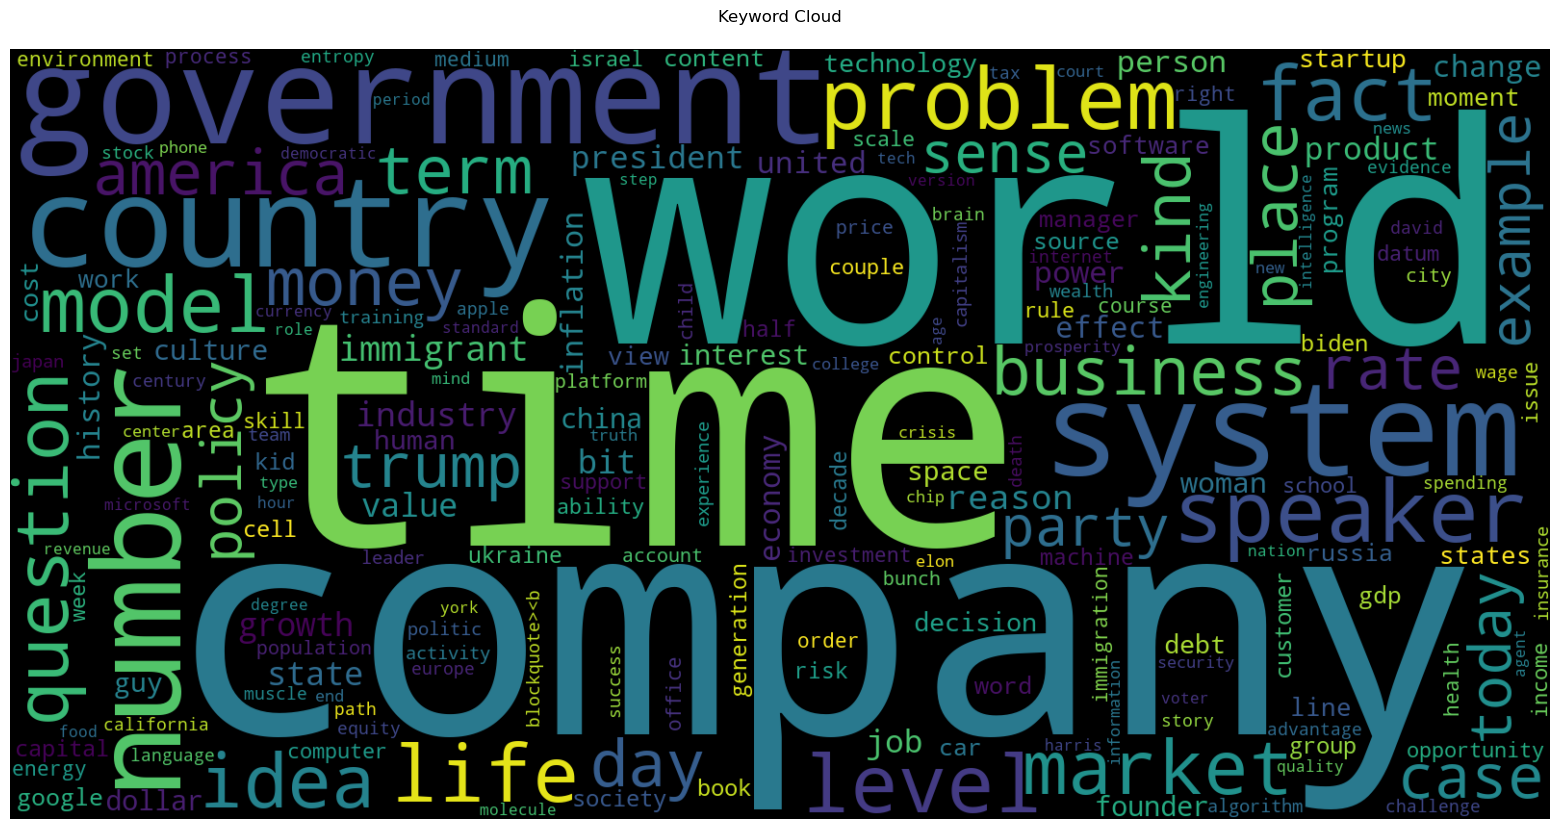

In [14]:
import spacy
import pandas as pd
from collections import Counter
import plotly.express as px
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from spacy.lang.de.stop_words import STOP_WORDS as de_stop_words

def analyze_keywords(df: pd.DataFrame) -> None:
    """Analyzes keywords from transcripts using spaCy, handling both English and German text.

    Args:
    ----
        df: DataFrame containing podcast transcripts in English and German

    Returns:
    -------
        None (displays visualizations)
    """
    # Load spaCy model
    nlp = spacy.load("en_core_web_sm")
    
    # Custom stopwords combining English, German and domain-specific words
    custom_stops = set(['people', 'thing', 'year', 'lot', 'point', 'das', 'man', 'der', 'way', 'stuff', 'sort', 'mal'])
    custom_stops.update(de_stop_words)
    
    # Combine all transcripts for overall analysis
    all_text = ' '.join(df['transcript_cleaned_of_md_and_html_tags'].dropna())
    
    # Process text with spaCy
    doc = nlp(all_text)
    
    # Extract relevant tokens (nouns and proper nouns, excluding stopwords)
    keywords = [token.lemma_.lower() for token in doc 
               if (token.pos_ in ['NOUN', 'PROPN'] 
                   and not token.is_stop 
                   and token.lemma_.lower() not in custom_stops
                   and len(token.text) > 2)]
    
    # Count frequencies
    word_freq = Counter(keywords)
    
    # Create DataFrame for top words
    top_words = pd.DataFrame(word_freq.most_common(30), 
                           columns=['word', 'frequency'])
    
    # Create bar chart
    fig = px.bar(top_words,
                 x='frequency',
                 y='word',
                 orientation='h',
                 title='Most Frequent Keywords Across All Transcripts',
                 template='plotly_dark')
    
    fig.update_layout(
        height=800,
        yaxis={'categoryorder':'total ascending'}
    )
    fig.show()
    
    # Create word cloud
    wordcloud = WordCloud(width=1600, 
                         height=800,
                         background_color='black',
                         colormap='viridis').generate_from_frequencies(word_freq)
    
    plt.figure(figsize=(20,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Keyword Cloud', pad=20)
    plt.show()
    
    # Analyze keywords by show
    for show in df['show'].unique():
        show_text = ' '.join(df[df['show'] == show]['transcript_cleaned_of_md_and_html_tags'].dropna())
        doc = nlp(show_text)
        
        keywords = [token.lemma_.lower() for token in doc 
                   if (token.pos_ in ['NOUN', 'PROPN'] 
                       and not token.is_stop
                       and token.lemma_.lower() not in custom_stops
                       and len(token.text) > 2)]
        
        word_freq = Counter(keywords)
        top_words = pd.DataFrame(word_freq.most_common(15), 
                               columns=['word', 'frequency'])
        
        fig = px.bar(top_words,
                     x='frequency',
                     y='word',
                     orientation='h',
                     title=f'Most Frequent Keywords in {show}',
                     template='plotly_dark')
        
        fig.update_layout(
            height=400,
            yaxis={'categoryorder':'total ascending'}
        )
        fig.show()

# First install required packages if needed:
# !pip install spacy wordcloud
# !python -m spacy download en_core_web_sm

# Run the analysis
analyze_keywords(df)
# stop words: 

In [287]:
df[['show', 'episode_title', 'snip_title', 'summary','transcript_cleaned_of_md_and_html_tags']]


show  \
294                           The Pioneer Briefing   
450                           The Pioneer Briefing   
451                           The Pioneer Briefing   
56                            The Pioneer Briefing   
12   All-In with Chamath, Jason, Sacks & Friedberg   
..                                             ...   
332             The Prof G Pod with Scott Galloway   
129                                 Prof G Markets   
24   All-In with Chamath, Jason, Sacks & Friedberg   
333             The Prof G Pod with Scott Galloway   
257  All-In with Chamath, Jason, Sacks & Friedberg   

                                         episode_title  \
294  Linnemann, Wagenknecht, Reintke: Die Lehren au...   
450  Kann Präsident Javier Milei Argentinien retten...   
451  Kann Präsident Javier Milei Argentinien retten...   
56   Warum tickt der Osten anders als der Westen, T...   
12   Dueling Presidential interviews, SpaceX’s big ...   
..                                                 ...   
332  Cold War II + An Update on Global Conflicts — ...   
129                          The Art of Spending Money   
24   New SEC Chair, Bitcoin, xAI Supercomputer, Uni...   
333  Cold War II + An Update on Global Conflicts — ...   
257  Trump assassination attempt, Secret Service fa...   

                                            snip_title  \
294                          Priorisierung und Handeln   
450                                           Untitled   
451                                           Untitled   
56                                            Untitled   
12   There are 440 nuclear power reactors operating...   
..                                                 ...   
332               Political Discourse as Contact Sport   
129                      Lifestyle Arbitrage with Kids   
24                              New Scaling Laws in AI   
333              Demographics Drive Political Dilemmas   
257   Considerations of Introducing Tariffs on Imports   

                                               summary  \
294  Wahlen bieten die Chance zur Neupriorisierung ...   
450                                                NaN   
451                                                NaN   
56                                                 NaN   
12   There are 440 nuclear power reactors operating...   
..                                                 ...   
332  The nature of political discourse in the Unite...   
129  Consider lifestyle arbitrage to reduce expense...   
24   Discussion on Grok 3's GPU cluster that will a...   
333  Aging populations in both the United States an...   
257  Introducing tariffs on imports can drive price...   

                transcript_cleaned_of_md_and_html_tags  
294  Wahlen sind ja auch immer die Chance zur Repri...  
450                                                NaN  
451                                                NaN  
56                                                 NaN  
12   A great adversarial point. Let's go to the fac...  
..                                                 ...  
332  It's interesting, if I understand your very sa...  
129  G (Scott Galloway)\n\nAlso, something I did on...  
24   Gavin Baker: The other question you raise, Dav...  
333  It's absolutely a feature. And visitors commen...  
257  No, no, I think that the idea, the general sta...  

[492 rows x 5 columns]

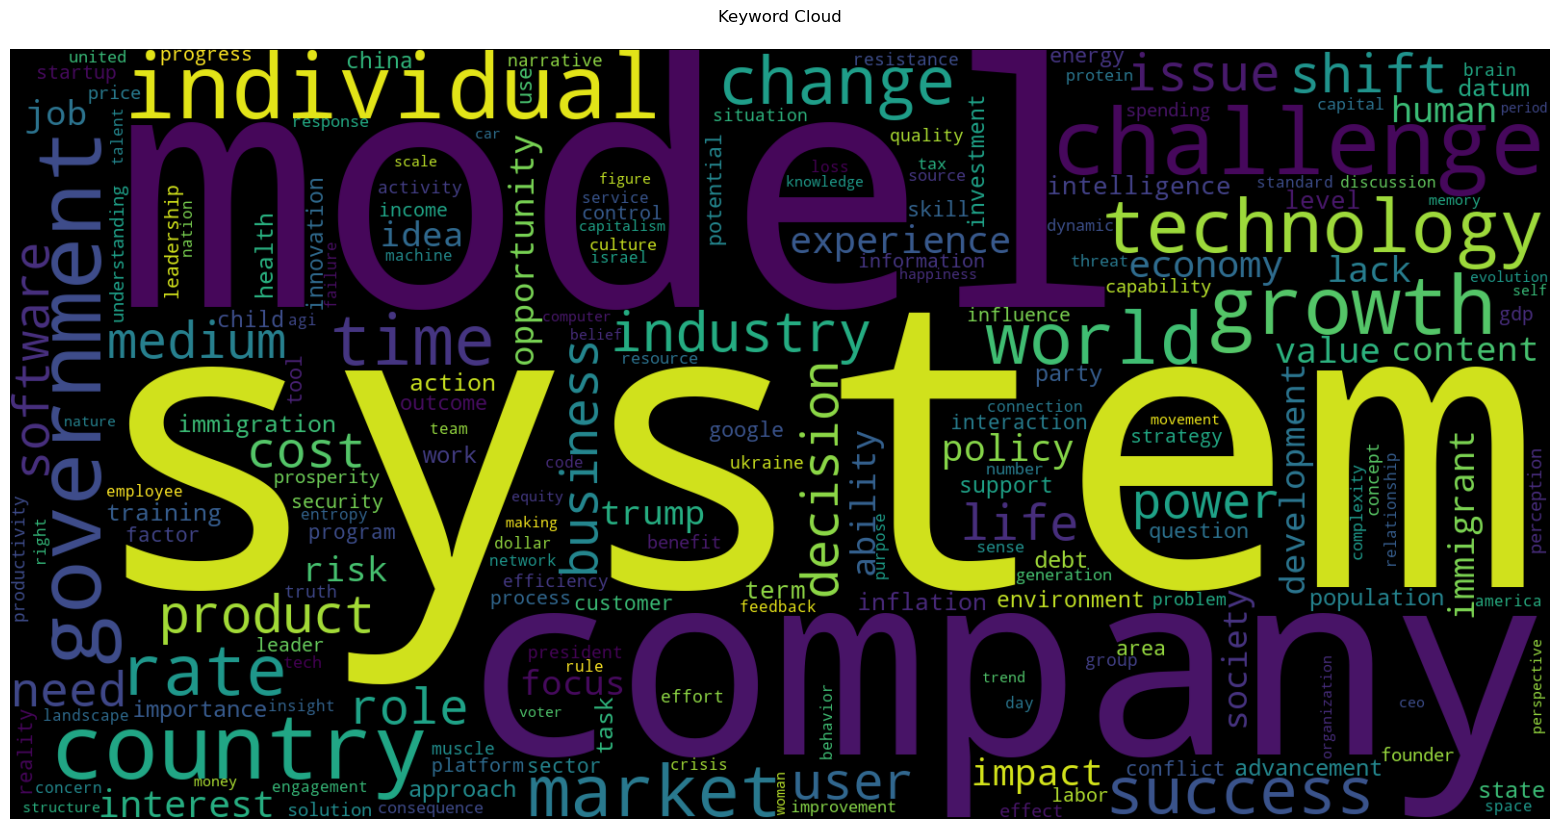

In [15]:
import spacy
import pandas as pd
from collections import Counter
import plotly.express as px
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from spacy.lang.de.stop_words import STOP_WORDS as de_stop_words

def analyze_keywords(df: pd.DataFrame) -> None:
    """Analyzes keywords from transcripts using spaCy, handling both English and German text.

    Args:
    ----
        df: DataFrame containing podcast transcripts in English and German

    Returns:
    -------
        None (displays visualizations)
    """
    # Load spaCy model
    nlp = spacy.load("en_core_web_sm")
    
    # Custom stopwords combining English, German and domain-specific words
    custom_stops = set(['people', 'thing', 'year', 'lot', 'point', 'das', 'man', 'der', 'way', 'stuff', 'sort', 'mal', 'speaker'])
    custom_stops.update(de_stop_words)
    
    # Combine all transcripts for overall analysis
    all_text = ' '.join(df['summary'].dropna())
    
    # Process text with spaCy
    doc = nlp(all_text)
    
    # Extract relevant tokens (nouns and proper nouns, excluding stopwords)
    keywords = [token.lemma_.lower() for token in doc 
               if (token.pos_ in ['NOUN', 'PROPN'] 
                   and not token.is_stop 
                   and token.lemma_.lower() not in custom_stops
                   and len(token.text) > 2)]
    
    # Count frequencies
    word_freq = Counter(keywords)
    
    # Create DataFrame for top words
    top_words = pd.DataFrame(word_freq.most_common(30), 
                           columns=['word', 'frequency'])
    
    # Create bar chart
    fig = px.bar(top_words,
                 x='frequency',
                 y='word',
                 orientation='h',
                 title='Most Frequent Keywords Across All Snip Summaries',
                 template='plotly_dark')
    
    fig.update_layout(
        height=800,
        yaxis={'categoryorder':'total ascending'}
    )
    fig.show()
    
    # Create word cloud
    wordcloud = WordCloud(width=1600, 
                         height=800,
                         background_color='black',
                         colormap='viridis').generate_from_frequencies(word_freq)
    
    plt.figure(figsize=(20,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Keyword Cloud', pad=20)
    plt.show()
    
    # Analyze keywords by show
    for show in df['show'].unique():
        show_text = ' '.join(df[df['show'] == show]['summary'].dropna())
        doc = nlp(show_text)
        
        keywords = [token.lemma_.lower() for token in doc 
                   if (token.pos_ in ['NOUN', 'PROPN'] 
                       and not token.is_stop
                       and token.lemma_.lower() not in custom_stops
                       and len(token.text) > 2)]
        
        word_freq = Counter(keywords)
        top_words = pd.DataFrame(word_freq.most_common(15), 
                               columns=['word', 'frequency'])
        
        fig = px.bar(top_words,
                     x='frequency',
                     y='word',
                     orientation='h',
                     title=f'Most Frequent Keywords in {show}',
                     template='plotly_dark')
        
        fig.update_layout(
            height=400,
            yaxis={'categoryorder':'total ascending'}
        )
        fig.show()

# First install required packages if needed:
# !pip install spacy wordcloud
# !python -m spacy download en_core_web_sm

# Run the analysis
analyze_keywords(df)
# stop words: 

In [293]:
import numpy as np
import pandas as pd
import spacy
from typing import Optional
from collections import Counter, defaultdict
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS
import plotly.express as px
import plotly.graph_objects as go

# If you’re also mixing German transcripts, import German stopwords:
from spacy.lang.de.stop_words import STOP_WORDS as de_stop_words

def create_show_keyword_visualization(df: pd.DataFrame, min_freq: int = 3) -> None:
    """Creates an interactive visualization of keywords clustered by show.

    Each keyword is placed in a 2D MDS projection, sized by how frequently
    it appears in total. Color is determined by the show that uses the
    keyword the most. Hovering shows the frequency for each show.

    Args:
    ----
        df (pd.DataFrame): A DataFrame containing at least a 'show' column
            and a 'summary' column. Each row is a snip or entry containing
            textual summary data from a particular show.
        min_freq (int): The minimum total frequency across all shows for
            a word to be included in this visualization.

    Returns:
    -------
        None: Displays an interactive Plotly figure in-line.
    """
    # Load spaCy for English
    # (If your environment includes mixed languages, consider also installing/dealing with a German model.)
    nlp = spacy.load("en_core_web_sm")

    # Gather all unique show names
    all_shows = sorted(df['show'].dropna().unique())

    # Define a set of custom stopwords, combining English, German, domain-specific
    # Add others like 'speaker', 'men', 'things' as needed
    custom_stops = {
        "people", "thing", "year", "lot", "point", "das", "man", "der", "way",
        "stuff", "sort", "mal", "speaker", "time", "going", "yeah", "gonna",
        "think", "know", "mean", "actually", "right", "really"
    }
    # Add German stopwords:
    custom_stops.update(de_stop_words)

    # Mark them as stopwords in the spaCy vocab
    for w in custom_stops:
        nlp.vocab[w].is_stop = True

    # We'll store frequencies for (show -> word -> freq)
    show_word_freq = defaultdict(Counter)
    total_word_freq = Counter()

    # Process text by show
    for show_name in all_shows:
        # Combine all summaries for this show
        show_text = ' '.join(df.loc[df['show'] == show_name, 'summary'].dropna())
        doc = nlp(show_text)

        # Extract only relevant tokens
        keywords = [
            token.lemma_.lower()
            for token in doc
            if (token.pos_ in ['NOUN', 'PROPN'] 
                and not token.is_stop
                and len(token.text) > 2)
        ]
        show_word_freq[show_name].update(keywords)
        total_word_freq.update(keywords)

    # Filter out words that don't meet the min_freq threshold across all shows
    common_words = {word for word, freq in total_word_freq.items() if freq >= min_freq}

    # Build vectors: each word is a vector over all shows (frequency distribution)
    # Then we can do MDS on the similarity matrix.
    word_vectors = []
    words = []
    dominant_shows = []
    hover_texts = []

    for word in sorted(common_words):
        # Vector dimension = number of shows
        # Each element is how many times 'word' appears in that show
        vector = [show_word_freq[s][word] for s in all_shows]
        total_count = sum(vector)

        # Enforce threshold again just to be sure
        if total_count >= min_freq:
            word_vectors.append(vector)
            words.append(word)
            # Pick whichever show has the highest frequency for coloring
            i_max = np.argmax(vector)
            show_max = all_shows[i_max]
            dominant_shows.append(show_max)

            # Build the hover text: show the frequencies across every show
            # e.g. <b>bitcoin</b><br>ShowA: 10<br>ShowB: 4
            hover_info = [f"{s}: {v}" for s, v in zip(all_shows, vector)]
            hover_html = f"<b>{word}</b><br>" + "<br>".join(hover_info)
            hover_texts.append(hover_html)

    # Convert to numpy array for distance/similarity calculations
    word_vectors = np.array(word_vectors, dtype=float)

    # Cosine similarity among all words
    similarities = cosine_similarity(word_vectors)

    # Use MDS to project 1 - similarity (distance) to 2D
    dist_matrix = 1 - similarities
    mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
    coords = mds.fit_transform(dist_matrix)

    # Prepare color palette
    # If you have more shows than the size of the palette,
    # consider picking a bigger palette or repeating.
    colors = px.colors.qualitative.Set3
    # If there are more shows than colors, repeat or just slice:
    color_cycle = (colors * ((len(all_shows) // len(colors)) + 1))[:len(all_shows)]

    # Create a dictionary mapping each *actual* show name to a color
    show_color_map = dict(zip(all_shows, color_cycle))

    # Build figure
    fig = go.Figure()

    # We will group words by their "dominant show" so that each show can be toggled.
    for show_name in all_shows:
        mask = np.array(dominant_shows) == show_name
        if not np.any(mask):
            continue

        # For sizing, let's use a log scale of the total count
        # so frequent words appear bigger
        word_subset = np.array(words)[mask]
        size_values = [np.log2(total_word_freq[w] + 1) * 5 for w in word_subset]

        x_vals = coords[mask, 0]
        y_vals = coords[mask, 1]

        # Fallback color if a show name is missing from the map
        color_choice = show_color_map.get(show_name, "gray")

        fig.add_trace(go.Scatter(
            x=x_vals,
            y=y_vals,
            text=word_subset,
            hovertext=np.array(hover_texts)[mask],
            mode='text+markers',
            name=show_name,
            textfont=dict(
                size=size_values,
                color=color_choice
            ),
            marker=dict(size=1),
            hoverinfo='text'
        ))

    fig.update_layout(
        title='Consolidated Keyword Clusters by Show',
        template='plotly_dark',
        height=800,
        width=1200,
        showlegend=True,
        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)
    )

    fig.show()

# Run the visualization
create_show_keyword_visualization(df, min_freq=5)

In [16]:
import numpy as np
import pandas as pd
import spacy
from typing import Optional
from collections import Counter, defaultdict
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS
import plotly.express as px
import plotly.graph_objects as go

# If you’re also mixing German transcripts, import German stopwords:
from spacy.lang.de.stop_words import STOP_WORDS as de_stop_words

def create_show_keyword_visualization(df: pd.DataFrame, min_freq: int = 3) -> None:
    """Creates an interactive visualization of keywords clustered by show.
    Each keyword is placed in a 2D MDS projection, sized by how frequently
    it appears in total. Color is determined by the show that uses the
    keyword the most. Hovering shows the frequency for each show (only nonzero).
    """
    # Load spaCy for English
    nlp = spacy.load("en_core_web_sm")

    # Gather all unique show names
    all_shows = sorted(df['show'].dropna().unique())

    # Define a set of custom stopwords
    custom_stops = {
        "people", "thing", "year", "lot", "point", "das", "man", "der", "way",
        "stuff", "sort", "mal", "speaker", "time", "going", "yeah", "gonna",
        "think", "know", "mean", "actually", "right", "really"
    }
    custom_stops.update(de_stop_words)
    for w in custom_stops:
        nlp.vocab[w].is_stop = True

    # Store frequencies for (show -> word -> freq)
    show_word_freq = defaultdict(Counter)
    total_word_freq = Counter()

    for show_name in all_shows:
        show_text = ' '.join(df.loc[df['show'] == show_name, 'summary'].dropna())
        doc = nlp(show_text)
        keywords = [
            token.lemma_.lower()
            for token in doc
            if token.pos_ in ['NOUN', 'PROPN']
            and not token.is_stop
            and len(token.text) > 2
        ]
        show_word_freq[show_name].update(keywords)
        total_word_freq.update(keywords)

    # Filter out words below min_freq
    common_words = {w for w, c in total_word_freq.items() if c >= min_freq}

    # Build frequency vectors
    word_vectors = []
    words = []
    dominant_shows = []
    hover_texts = []

    for word in sorted(common_words):
        vector = [show_word_freq[s][word] for s in all_shows]
        total_count = sum(vector)
        if total_count < min_freq:
            continue
        word_vectors.append(vector)
        words.append(word)

        # Determine which show has the highest frequency
        i_max = np.argmax(vector)
        show_max = all_shows[i_max]
        dominant_shows.append(show_max)

        # Build hover text for nonzero frequencies, sorted descending
        nonzero_shows = [(s, v) for s, v in zip(all_shows, vector) if v > 0]
        nonzero_shows = sorted(nonzero_shows, key=lambda x: x[1], reverse=True)
        hover_info = [f"{s}: {v}" for s, v in nonzero_shows]
        hover_html = f"<b>{word}</b><br>" + "<br>".join(hover_info)
        hover_texts.append(hover_html)

    word_vectors = np.array(word_vectors, dtype=float)

    # Compute similarities
    similarities = cosine_similarity(word_vectors)
    dist_matrix = 1 - similarities

    # MDS projection
    mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
    coords = mds.fit_transform(dist_matrix)

    # Optionally jitter to reduce exact overlap
    jitter_strength = 0.03
    coords_jittered = coords + np.random.normal(0, jitter_strength, coords.shape)

    # Prepare color palette
    colors = px.colors.qualitative.Set3
    color_cycle = (colors * ((len(all_shows) // len(colors)) + 1))[:len(all_shows)]
    show_color_map = dict(zip(all_shows, color_cycle))

    fig = go.Figure()

    # Group by the show with highest frequency
    for show_name in all_shows:
        mask = np.array(dominant_shows) == show_name
        if not np.any(mask):
            continue
        word_subset = np.array(words)[mask]
        size_values = [np.log2(total_word_freq[w] + 1) * 5 for w in word_subset]

        x_vals = coords_jittered[mask, 0]
        y_vals = coords_jittered[mask, 1]

        color_choice = show_color_map.get(show_name, "gray")

        fig.add_trace(go.Scatter(
            x=x_vals,
            y=y_vals,
            text=word_subset,
            hovertext=np.array(hover_texts)[mask],
            mode='markers+text',
            name=show_name,
            textposition='top center',   # or try 'auto'
            textfont=dict(
                size=size_values,
                color=color_choice
            ),
            marker=dict(
                size=10,
                color=color_choice,
                symbol='circle'
            ),
            hoverinfo='text'
        ))

    fig.update_layout(
        title='Consolidated Keyword Clusters by Show',
        template='plotly_dark',
        height=800,
        width=1200,
        showlegend=True,
        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        legend=dict(
            orientation="v",
            x=1.02,
            y=1,
            xanchor="left",
            yanchor="auto",
            bgcolor="rgba(0,0,0,0)"
        )
    )

    fig.show()
create_show_keyword_visualization(df, min_freq=5)


In [296]:
import numpy as np
import pandas as pd
import spacy
from typing import Optional
from collections import Counter, defaultdict
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS
import plotly.express as px
import plotly.graph_objects as go

from spacy.lang.de.stop_words import STOP_WORDS as de_stop_words

def create_show_keyword_visualization(df: pd.DataFrame, min_freq: int = 3) -> None:
    nlp = spacy.load("en_core_web_sm")

    all_shows = sorted(df['show'].dropna().unique())

    # Stopwords
    custom_stops = {
        "people", "thing", "year", "lot", "point", "das", "man", "der", "way",
        "stuff", "sort", "mal", "speaker", "time", "going", "yeah", "gonna",
        "think", "know", "mean", "actually", "right", "really"
    }
    custom_stops.update(de_stop_words)
    for w in custom_stops:
        nlp.vocab[w].is_stop = True

    show_word_freq = defaultdict(Counter)
    total_word_freq = Counter()

    for show_name in all_shows:
        show_text = ' '.join(df.loc[df['show'] == show_name, 'summary'].dropna())
        doc = nlp(show_text)
        keywords = [
            token.lemma_.lower()
            for token in doc
            if token.pos_ in ['NOUN', 'PROPN']
            and not token.is_stop
            and len(token.text) > 2
        ]
        show_word_freq[show_name].update(keywords)
        total_word_freq.update(keywords)

    common_words = {w for w, c in total_word_freq.items() if c >= min_freq}

    word_vectors = []
    words = []
    dominant_shows = []
    hover_texts = []

    for word in sorted(common_words):
        vector = [show_word_freq[s][word] for s in all_shows]
        total_count = sum(vector)
        if total_count < min_freq:
            continue
        word_vectors.append(vector)
        words.append(word)

        i_max = np.argmax(vector)
        show_max = all_shows[i_max]
        dominant_shows.append(show_max)

        # Show only nonzero frequencies, in descending order
        nonzero = [(s, v) for s, v in zip(all_shows, vector) if v > 0]
        nonzero = sorted(nonzero, key=lambda x: x[1], reverse=True)
        hover_html = f"<b>{word}</b><br>" + "<br>".join(f"{s}: {v}" for s, v in nonzero)
        hover_texts.append(hover_html)

    word_vectors = np.array(word_vectors, dtype=float)

    similarities = cosine_similarity(word_vectors)
    dist_matrix = 1 - similarities

    mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
    coords = mds.fit_transform(dist_matrix)

    # Jitter the coordinates to reduce direct overlap
    jitter_strength = 0.02
    coords_jittered = coords + np.random.normal(0, jitter_strength, coords.shape)

    colors = px.colors.qualitative.Set3
    color_cycle = (colors * ((len(all_shows) // len(colors)) + 1))[:len(all_shows)]
    show_color_map = dict(zip(all_shows, color_cycle))

    fig = go.Figure()

    # Possible text positions so they're not all in the same place
    text_positions = ['top center', 'top left', 'top right',
                      'bottom center', 'bottom left', 'bottom right']

    for show_name in all_shows:
        mask = (np.array(dominant_shows) == show_name)
        if not np.any(mask):
            continue

        word_subset = np.array(words)[mask]
        # Larger exponent so bigger words are visibly larger
        size_values = [np.log2(total_word_freq[w] + 1)**2 * 6 for w in word_subset]

        x_vals = coords_jittered[mask, 0]
        y_vals = coords_jittered[mask, 1]

        color_choice = show_color_map.get(show_name, "gray")
        subset_hover = np.array(hover_texts)[mask]

        # Randomly choose a text position for each word
        random_positions = np.random.choice(text_positions, size=len(word_subset))

        # Optionally do further offset shifts:
        # e.g. up to ±20 in screen space
        x_shifts = np.random.randint(-20, 21, size=len(word_subset))
        y_shifts = np.random.randint(-20, 21, size=len(word_subset))

        fig.add_trace(go.Scatter(
            x=x_vals,
            y=y_vals,
            text=word_subset,
            hovertext=subset_hover,
            mode='markers+text',
            name=show_name,
            textposition=random_positions,
            textfont=dict(size=size_values, color=color_choice),
            marker=dict(
                size=10,
                color=color_choice,
                symbol='circle'
            ),
            # xshift / yshift can be used to nudge text:
            # But note, xshift/yshift are in “pixel” units, not data coords.
            # So we have to pass in an array as part of 'textfont', which plotly doesn’t
            # natively allow. Instead, we might do separate sub-traces if we need per-point shift.
            # For a single shift, do:
            #   textposition='top center', textfont={'size': <>, 'color': <>, 'family': '...'},
            #   textoffset='10'  # but that applies to all points
            hoverinfo='text'
        ))

    fig.update_layout(
        title='Consolidated Keyword Clusters by Show',
        template='plotly_dark',
        height=800,
        width=1200,
        showlegend=True,
        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        legend=dict(
            orientation="v",
            x=1.02,
            y=1,
            xanchor="left",
            yanchor="auto",
            bgcolor="rgba(0,0,0,0)"
        )
    )

    fig.show()
create_show_keyword_visualization(df, min_freq=5)

In [301]:
import numpy as np
import pandas as pd
import spacy
from typing import Optional
from collections import Counter, defaultdict
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS
import plotly.express as px
import plotly.graph_objects as go

# If you're mixing German transcripts, import German stopwords:
from spacy.lang.de.stop_words import STOP_WORDS as de_stop_words

import numpy as np
import pandas as pd
import spacy
from typing import Optional
from collections import Counter, defaultdict
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS
import plotly.express as px
import plotly.graph_objects as go

# If you're mixing German transcripts, import German stopwords:
from spacy.lang.de.stop_words import STOP_WORDS as de_stop_words

def create_show_keyword_visualization_3d(df: pd.DataFrame, min_freq: int = 3) -> None:
    """Creates a smaller-text 3D interactive visualization of keywords clustered by show."""
    nlp = spacy.load("en_core_web_sm")

    # Gather all show names
    all_shows = sorted(df['show'].dropna().unique())

    # Combine English/German stopwords and any domain-specific ones
    custom_stops = {
        "people", "thing", "year", "lot", "point", "das", "man", "der", "way",
        "stuff", "sort", "mal", "speaker", "time", "going", "yeah", "gonna",
        "think", "know", "mean", "actually", "right", "really"
    }
    custom_stops.update(de_stop_words)
    for w in custom_stops:
        nlp.vocab[w].is_stop = True

    # Count frequencies
    show_word_freq = defaultdict(Counter)
    total_word_freq = Counter()
    for show_name in all_shows:
        show_text = ' '.join(df.loc[df['show'] == show_name, 'summary'].dropna())
        doc = nlp(show_text)
        keywords = [
            token.lemma_.lower()
            for token in doc
            if token.pos_ in ['NOUN', 'PROPN']
            and not token.is_stop
            and len(token.text) > 2
        ]
        show_word_freq[show_name].update(keywords)
        total_word_freq.update(keywords)

    # Filter out words below min_freq
    common_words = {w for w, c in total_word_freq.items() if c >= min_freq}

    words = []
    word_vectors = []
    dominant_shows = []
    hover_texts = []

    for word in sorted(common_words):
        vector = [show_word_freq[s][word] for s in all_shows]
        total_count = sum(vector)
        if total_count < min_freq:
            continue
        
        words.append(word)
        word_vectors.append(vector)

        # Determine "dominant" show for coloring
        i_max = np.argmax(vector)
        show_max = all_shows[i_max]
        dominant_shows.append(show_max)

        # Build hover text for nonzero frequencies, sorted descending
        nonzero = [(s, v) for s, v in zip(all_shows, vector) if v > 0]
        nonzero.sort(key=lambda x: x[1], reverse=True)
        hover_html = f"<b>{word}</b><br>" + "<br>".join(f"{s}: {v}" for s, v in nonzero)
        hover_texts.append(hover_html)

    word_vectors = np.array(word_vectors, dtype=float)

    # Distance = 1 - cosine similarity
    similarities = cosine_similarity(word_vectors)
    dist_matrix = 1 - similarities

    # Project to 3D with MDS
    mds = MDS(n_components=3, dissimilarity='precomputed', random_state=42)
    coords_3d = mds.fit_transform(dist_matrix)

    # Slight random jitter to help reduce collisions
    jitter_strength = 0.02
    coords_3d_jittered = coords_3d + np.random.normal(0, jitter_strength, coords_3d.shape)

    # Prepare color mapping
    colors = px.colors.qualitative.Set3
    color_cycle = (colors * ((len(all_shows) // len(colors)) + 1))[:len(all_shows)]
    show_color_map = dict(zip(all_shows, color_cycle))

    fig = go.Figure()

    # We'll make big words smaller by dialing back the scale factor.
    # Instead of log2(...)^2, let's do a smaller exponent or just log2 times a small constant.
    for show_name in all_shows:
        mask = (np.array(dominant_shows) == show_name)
        if not np.any(mask):
            continue

        word_subset = np.array(words)[mask]
        # Just do log2(...) * 2.5 as an example
        size_values = [np.log2(total_word_freq[w] + 1) * 2.5 for w in word_subset]

        x_vals = coords_3d_jittered[mask, 0]
        y_vals = coords_3d_jittered[mask, 1]
        z_vals = coords_3d_jittered[mask, 2]

        color_choice = show_color_map.get(show_name, "gray")
        subset_hover = np.array(hover_texts)[mask]

        fig.add_trace(go.Scatter3d(
            x=x_vals,
            y=y_vals,
            z=z_vals,
            text=word_subset,
            hovertext=subset_hover,
            mode='markers+text',
            name=show_name,
            textposition='top center',
            textfont=dict(size=size_values, color=color_choice),
            marker=dict(size=4, color=color_choice),
            hoverinfo='text'
        ))

    # Configure layout
    fig.update_layout(
        title='Clusters by Show (3D)',
        template='plotly_dark',
        height=800,
        width=1200,
        showlegend=True,
        scene=dict(
            xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
            yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
            zaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        ),
        legend=dict(
            orientation="v",
            x=1.02,
            y=1,
            xanchor="left",
            yanchor="auto",
            bgcolor="rgba(0,0,0,0)",
            itemsizing='constant',  # Make legend markers a constant size
            itemwidth=30  # Increase size of legend markers
        )
    )

    fig.show()


# Usage:
create_show_keyword_visualization_3d(df, min_freq=7)


Cluster based on sematic menaing

In [306]:
import numpy as np
import pandas as pd
import spacy
from typing import Optional
from collections import Counter, defaultdict
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS
import plotly.express as px
import plotly.graph_objects as go

# If you're mixing German transcripts, import German stopwords:
from spacy.lang.de.stop_words import STOP_WORDS as de_stop_words

def create_show_keyword_visualization(df: pd.DataFrame, min_freq: int = 3, dimensionality: int = 3) -> None:
    """
    Creates an interactive visualization of keywords clustered by show based on semantic meaning.
    
    Parameters:
    - df: pd.DataFrame containing at least 'show' and 'summary' columns.
    - min_freq: Minimum total frequency for a word to be included.
    - dimensionality: 2 for 2D plot, 3 for 3D plot.
    """
    if dimensionality not in [2, 3]:
        raise ValueError("dimensionality must be either 2 or 3")
    
    # Load a SpaCy model with word vectors
    try:
        nlp = spacy.load("en_core_web_md")  # Use 'en_core_web_lg' for larger vectors
    except OSError:
        raise OSError("SpaCy model 'en_core_web_md' not found. Please download it using:\n"
                      "python -m spacy download en_core_web_md")
    
    # Gather all show names
    all_shows = sorted(df['show'].dropna().unique())
    
    # Combine English/German stopwords and any domain-specific ones
    custom_stops = {
        "people", "thing", "year", "lot", "point", "das", "man", "der", "way",
        "stuff", "sort", "mal", "speaker", "time", "going", "yeah", "gonna",
        "think", "know", "mean", "actually", "right", "really"
    }
    custom_stops.update(de_stop_words)
    for w in custom_stops:
        nlp.vocab[w].is_stop = True
    
    # Count frequencies
    show_word_freq = defaultdict(Counter)
    total_word_freq = Counter()
    for show_name in all_shows:
        show_text = ' '.join(df.loc[df['show'] == show_name, 'summary'].dropna())
        doc = nlp(show_text)
        keywords = [
            token.lemma_.lower()
            for token in doc
            if token.pos_ in ['NOUN', 'PROPN']
            and not token.is_stop
            and len(token.text) > 2
            and token.has_vector  # Ensure the token has a vector representation
        ]
        show_word_freq[show_name].update(keywords)
        total_word_freq.update(keywords)
    
    # Filter out words below min_freq
    common_words = {w for w, c in total_word_freq.items() if c >= min_freq}
    
    words = []
    word_vectors = []
    dominant_shows = []
    hover_texts = []
    word_total_freq = []
    
    for word in sorted(common_words):
        # Get the word vector from SpaCy
        if not nlp.vocab.has_vector(word):
            continue  # Skip words without vectors
        
        vector = nlp.vocab[word].vector
        words.append(word)
        word_vectors.append(vector)
        word_total_freq.append(total_word_freq[word])
        
        # Determine "dominant" show for coloring
        show_counts = {s: show_word_freq[s][word] for s in all_shows}
        show_max = max(show_counts, key=show_counts.get)
        dominant_shows.append(show_max)
        
        # Build hover text for nonzero frequencies, sorted descending
        nonzero = [(s, v) for s, v in show_counts.items() if v > 0]
        nonzero.sort(key=lambda x: x[1], reverse=True)
        hover_html = f"<b>{word}</b><br>" + "<br>".join(f"{s}: {v}" for s, v in nonzero)
        hover_texts.append(hover_html)
    
    if not words:
        print("No words to display after filtering. Adjust 'min_freq' or check the data.")
        return
    
    word_vectors = np.array(word_vectors, dtype=float)
    
    # Normalize vectors to unit length for better similarity computation
    word_vectors_norm = word_vectors / np.linalg.norm(word_vectors, axis=1, keepdims=True)
    
    # Compute cosine similarity and distance matrix
    similarities = cosine_similarity(word_vectors_norm)
    dist_matrix = 1 - similarities
    
    # Dimensionality reduction with MDS
    mds = MDS(n_components=dimensionality, dissimilarity='precomputed', random_state=42)
    coords = mds.fit_transform(dist_matrix)
    
    # If 2D, add a dummy z-axis
    if dimensionality == 2:
        coords_2d = coords
        coords_display = np.hstack([coords_2d, np.zeros((coords_2d.shape[0], 1))])
    else:
        coords_display = coords
    
    # Slight random jitter to help reduce collisions
    jitter_strength = 0.02
    coords_jittered = coords_display + np.random.normal(0, jitter_strength, coords_display.shape)
    
    # Prepare color mapping
    colors = px.colors.qualitative.Set3
    color_cycle = (colors * ((len(all_shows) // len(colors)) + 1))[:len(all_shows)]
    show_color_map = dict(zip(all_shows, color_cycle))
    
    # Prepare marker sizes based on total frequency
    # Scale sizes to a reasonable range, e.g., 10 to 30
    freq_array = np.array(word_total_freq)
    size_min = 10
    size_max = 30
    freq_norm = (freq_array - freq_array.min()) / (freq_array.max() - freq_array.min() + 1e-6)
    size_values = size_min + freq_norm * (size_max - size_min)
    
    fig = go.Figure()
    
    for show_name in all_shows:
        mask = (np.array(dominant_shows) == show_name)
        if not np.any(mask):
            continue
        
        word_subset = np.array(words)[mask]
        size_subset = size_values[mask]
        x_vals = coords_jittered[mask, 0]
        y_vals = coords_jittered[mask, 1]
        z_vals = coords_jittered[mask, 2]
        color_choice = show_color_map.get(show_name, "gray")
        subset_hover = np.array(hover_texts)[mask]
        
        if dimensionality == 2:
            fig.add_trace(go.Scatter(
                x=x_vals,
                y=y_vals,
                text=word_subset,
                hovertext=subset_hover,
                mode='markers+text',
                name=show_name,
                textposition='top center',
                textfont=dict(size=size_subset, color=color_choice),
                marker=dict(size=4, color=color_choice),
                hoverinfo='text'
            ))
        else:
            fig.add_trace(go.Scatter3d(
                x=x_vals,
                y=y_vals,
                z=z_vals,
                text=word_subset,
                hovertext=subset_hover,
                mode='markers+text',
                name=show_name,
                textposition='top center',
                textfont=dict(size=size_subset, color=color_choice),
                marker=dict(size=4, color=color_choice),
                hoverinfo='text'
            ))
    
    # Configure layout
    if dimensionality == 2:
        layout = dict(
            title='Clusters by Show (2D)',
            template='plotly_dark',
            height=800,
            width=1200,
            showlegend=True,
            xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
            yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
            legend=dict(
                orientation="v",
                x=1.02,
                y=1,
                xanchor="left",
                yanchor="auto",
                bgcolor="rgba(0,0,0,0)",
                itemsizing='constant',  # Make legend markers a constant size
                itemwidth=30  # Increase size of legend markers
            )
        )
    else:
        layout = dict(
            title='Clusters by Show (3D)',
            template='plotly_dark',
            height=800,
            width=1200,
            showlegend=True,
            scene=dict(
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                zaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
            ),
            legend=dict(
                orientation="v",
                x=1.02,
                y=1,
                xanchor="left",
                yanchor="auto",
                bgcolor="rgba(0,0,0,0)",
                itemsizing='constant',  # Make legend markers a constant size
                itemwidth=30  # Increase size of legend markers
            )
        )
    
    fig.update_layout(layout)
    
    fig.show()

# Usage Examples:
# For a 3D plot
# create_show_keyword_visualization(df, min_freq=7, dimensionality=3)

# For a 2D plot
create_show_keyword_visualization(df, min_freq=15, dimensionality=2)


In [7]:
import numpy as np
import pandas as pd
import spacy
from typing import Optional
from collections import Counter, defaultdict
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS, TSNE
import plotly.express as px
import plotly.graph_objects as go

# If you're mixing German transcripts, import German stopwords:
from spacy.lang.de.stop_words import STOP_WORDS as de_stop_words

def create_show_keyword_visualization(
    df: pd.DataFrame,
    min_freq: int = 3,
    dimensionality: int = 3,
    method: str = 'MDS'
) -> None:
    """
    Creates an interactive visualization of keywords clustered by show based on semantic meaning.
    
    Parameters:
    - df: pd.DataFrame containing at least 'show' and 'summary' columns.
    - min_freq: Minimum total frequency for a word to be included.
    - dimensionality: 2 for 2D plot, 3 for 3D plot.
    - method: Dimensionality reduction method ('MDS', 't-SNE', 'UMAP').
    """
    if dimensionality not in [2, 3]:
        raise ValueError("dimensionality must be either 2 or 3")
    
    if method not in ['MDS', 't-SNE', 'UMAP']:
        raise ValueError("method must be one of 'MDS', 't-SNE', or 'UMAP'")
    
    # Load a SpaCy model with word vectors
    try:
        nlp = spacy.load("en_core_web_md")  # Use 'en_core_web_lg' for larger vectors
    except OSError:
        raise OSError("SpaCy model 'en_core_web_md' not found. Please download it using:\n"
                      "python -m spacy download en_core_web_md")
    
    # Gather all show names
    all_shows = sorted(df['show'].dropna().unique())
    
    # Combine English/German stopwords and any domain-specific ones
    custom_stops = {
        "people", "thing", "year", "lot", "point", "das", "man", "der", "way",
        "stuff", "sort", "mal", "speaker", "time", "going", "yeah", "gonna",
        "think", "know", "mean", "actually", "right", "really"
    }
    custom_stops.update(de_stop_words)
    for w in custom_stops:
        nlp.vocab[w].is_stop = True
    
    # Count frequencies
    show_word_freq = defaultdict(Counter)
    total_word_freq = Counter()
    for show_name in all_shows:
        show_text = ' '.join(df.loc[df['show'] == show_name, 'summary'].dropna())
        doc = nlp(show_text)
        keywords = [
            token.lemma_.lower()
            for token in doc
            if token.pos_ in ['NOUN', 'PROPN']
            and not token.is_stop
            and len(token.text) > 2
            and token.has_vector  # Ensure the token has a vector representation
        ]
        show_word_freq[show_name].update(keywords)
        total_word_freq.update(keywords)
    
    # Filter out words below min_freq
    common_words = {w for w, c in total_word_freq.items() if c >= min_freq}
    
    words = []
    word_vectors = []
    dominant_shows = []
    hover_texts = []
    word_total_freq = []
    
    for word in sorted(common_words):
        # Get the word vector from SpaCy
        if not nlp.vocab.has_vector(word):
            continue  # Skip words without vectors
        
        vector = nlp.vocab[word].vector
        words.append(word)
        word_vectors.append(vector)
        word_total_freq.append(total_word_freq[word])
        
        # Determine "dominant" show for coloring
        show_counts = {s: show_word_freq[s][word] for s in all_shows}
        show_max = max(show_counts, key=show_counts.get)
        dominant_shows.append(show_max)
        
        # Build hover text for nonzero frequencies, sorted descending
        nonzero = [(s, v) for s, v in show_counts.items() if v > 0]
        nonzero.sort(key=lambda x: x[1], reverse=True)
        hover_html = f"<b>{word}</b><br>" + "<br>".join(f"{s}: {v}" for s, v in nonzero)
        hover_texts.append(hover_html)
    
    if not words:
        print("No words to display after filtering. Adjust 'min_freq' or check the data.")
        return
    
    word_vectors = np.array(word_vectors, dtype=float)
    
    # Normalize vectors to unit length for better similarity computation
    word_vectors_norm = word_vectors / np.linalg.norm(word_vectors, axis=1, keepdims=True)
    
    # Dimensionality reduction
    if method == 'MDS':
        # Distance = 1 - cosine similarity
        similarities = cosine_similarity(word_vectors_norm)
        dist_matrix = 1 - similarities
        reducer = MDS(n_components=dimensionality, dissimilarity='precomputed', random_state=42)
        coords = reducer.fit_transform(dist_matrix)
    elif method == 't-SNE':
        reducer = TSNE(n_components=dimensionality, metric='cosine', random_state=42, perplexity=30, n_iter=1000)
        coords = reducer.fit_transform(word_vectors_norm)
    elif method == 'UMAP':
        try:
            import umap
        except ImportError:
            raise ImportError("UMAP is not installed. Please install it using 'pip install umap-learn'")
        reducer = umap.UMAP(n_components=dimensionality, metric='cosine', random_state=42)
        coords = reducer.fit_transform(word_vectors_norm)
    
    # Scale coordinates to increase separation
    scaling_factor = 10  # Adjust this value as needed
    coords_scaled = coords * scaling_factor
    
    # Slight random jitter to help reduce collisions
    jitter_strength = 0.5  # Increased jitter strength
    coords_jittered = coords_scaled + np.random.normal(0, jitter_strength, coords_scaled.shape)
    
    # Prepare color mapping
    colors = px.colors.qualitative.Set3
    color_cycle = (colors * ((len(all_shows) // len(colors)) + 1))[:len(all_shows)]
    show_color_map = dict(zip(all_shows, color_cycle))
    
    # Prepare marker sizes based on total frequency
    # Scale sizes to a reasonable range, e.g., 10 to 30
    freq_array = np.array(word_total_freq)
    size_min = 10
    size_max = 30
    freq_norm = (freq_array - freq_array.min()) / (freq_array.max() - freq_array.min() + 1e-6)
    size_values = size_min + freq_norm * (size_max - size_min)
    
    fig = go.Figure()
    
    for show_name in all_shows:
        mask = (np.array(dominant_shows) == show_name)
        if not np.any(mask):
            continue
        
        word_subset = np.array(words)[mask]
        size_subset = size_values[mask]
        x_vals = coords_jittered[mask, 0]
        y_vals = coords_jittered[mask, 1]
        if dimensionality == 3:
            z_vals = coords_jittered[mask, 2]
        color_choice = show_color_map.get(show_name, "gray")
        subset_hover = np.array(hover_texts)[mask]
        
        if dimensionality == 2:
            fig.add_trace(go.Scatter(
                x=x_vals,
                y=y_vals,
                text=word_subset,
                hovertext=subset_hover,
                mode='markers+text',
                name=show_name,
                textposition='middle center',  # Adjusted text position
                textfont=dict(size=size_subset, color=color_choice),
                marker=dict(size=6, color=color_choice, opacity=0.8),
                hoverinfo='text'
            ))
        else:
            fig.add_trace(go.Scatter3d(
                x=x_vals,
                y=y_vals,
                z=coords_jittered[mask, 2],
                text=word_subset,
                hovertext=subset_hover,
                mode='markers+text',
                name=show_name,
                textposition='middle center',  # Adjusted text position
                textfont=dict(size=size_subset, color=color_choice),
                marker=dict(size=6, color=color_choice, opacity=0.8),
                hoverinfo='text'
            ))
    
    # Configure layout
    if dimensionality == 2:
        layout = dict(
            title='Clusters by Show (2D)',
            template='plotly_dark',
            height=800,
            width=1200,
            showlegend=True,
            xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
            yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
            legend=dict(
                orientation="v",
                x=1.02,
                y=1,
                xanchor="left",
                yanchor="auto",
                bgcolor="rgba(0,0,0,0)",
                itemsizing='constant',  # Make legend markers a constant size
                itemwidth=30  # Increase size of legend markers
            )
        )
    else:
        layout = dict(
            title='Clusters by Show (3D)',
            template='plotly_dark',
            height=800,
            width=1200,
            showlegend=True,
            scene=dict(
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                zaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
            ),
            legend=dict(
                orientation="v",
                x=1.02,
                y=1,
                xanchor="left",
                yanchor="auto",
                bgcolor="rgba(0,0,0,0)",
                itemsizing='constant',  # Make legend markers a constant size
                itemwidth=30  # Increase size of legend markers
            )
        )
    
    fig.update_layout(layout)
    
    # Enhance interactivity for better exploration
    if dimensionality == 3:
        fig.update_traces(
            selector=dict(type='scatter3d'),
            textposition='top center',
            hoverlabel=dict(bgcolor="white", font_size=12, font_family="Arial")
        )
    else:
        fig.update_traces(
            selector=dict(type='scatter'),
            textposition='top center',
            hoverlabel=dict(bgcolor="white", font_size=12, font_family="Arial")
        )
    
    fig.show()

# Usage Examples:
# For a 3D plot using t-SNE
# create_show_keyword_visualization(df, min_freq=7, dimensionality=3, method='t-SNE')

# For a 2D plot using t-SNE
create_show_keyword_visualization(df, min_freq=7, dimensionality=3, method='t-SNE')



# Best 3D

In [24]:
import numpy as np
import pandas as pd
import spacy
from typing import Optional
from collections import Counter, defaultdict
from sklearn.metrics.pairwise import cosine_similarity
import umap
import hdbscan
import plotly.express as px
import plotly.graph_objects as go

# If you're mixing German transcripts, import German stopwords:
from spacy.lang.de.stop_words import STOP_WORDS as de_stop_words

def create_show_keyword_visualization(
    df: pd.DataFrame,
    min_freq: int = 3,
    dimensionality: int = 2,
    method: str = 'UMAP',
    clustering: bool = True,
    cluster_selection_method: str = 'eom'  # For HDBSCAN
) -> None:
    """
    Creates an interactive visualization of keywords clustered by show based on semantic meaning.
    
    Parameters:
    - df: pd.DataFrame containing at least 'show' and 'summary' columns.
    - min_freq: Minimum total frequency for a word to be included.
    - dimensionality: 2 for 2D plot, 3 for 3D plot.
    - method: Dimensionality reduction method ('UMAP', 't-SNE', 'MDS').
    - clustering: Whether to apply clustering to define dedicated regions.
    - cluster_selection_method: Method for HDBSCAN clustering ('eom' or 'leaf').
    """
    if dimensionality not in [2, 3]:
        raise ValueError("dimensionality must be either 2 or 3")
    
    if method not in ['MDS', 't-SNE', 'UMAP']:
        raise ValueError("method must be one of 'MDS', 't-SNE', or 'UMAP'")
    
    # Load a SpaCy model with word vectors
    try:
        nlp = spacy.load("en_core_web_md")  # Use 'en_core_web_lg' for larger vectors
    except OSError:
        raise OSError("SpaCy model 'en_core_web_md' not found. Please download it using:\n"
                      "python -m spacy download en_core_web_md")
    
    # Gather all show names
    all_shows = sorted(df['show'].dropna().unique())
    
    # Combine English/German stopwords and any domain-specific ones
    custom_stops = {
        "people", "thing", "year", "lot", "point", "das", "man", "der", "way",
        "stuff", "sort", "mal", "speaker", "time", "going", "yeah", "gonna",
        "think", "know", "mean", "actually", "right", "really"
    }
    custom_stops.update(de_stop_words)
    for w in custom_stops:
        nlp.vocab[w].is_stop = True
    
    # Count frequencies
    show_word_freq = defaultdict(Counter)
    total_word_freq = Counter()
    for show_name in all_shows:
        show_text = ' '.join(df.loc[df['show'] == show_name, 'summary'].dropna())
        doc = nlp(show_text)
        keywords = [
            token.lemma_.lower()
            for token in doc
            if token.pos_ in ['NOUN', 'PROPN']
            and not token.is_stop
            and len(token.text) > 2
            and token.has_vector  # Ensure the token has a vector representation
        ]
        show_word_freq[show_name].update(keywords)
        total_word_freq.update(keywords)
    
    # Filter out words below min_freq
    common_words = {w for w, c in total_word_freq.items() if c >= min_freq}
    
    words = []
    word_vectors = []
    dominant_shows = []
    hover_texts = []
    word_total_freq = []
    
    for word in sorted(common_words):
        # Get the word vector from SpaCy
        if not nlp.vocab.has_vector(word):
            continue  # Skip words without vectors
        
        vector = nlp.vocab[word].vector
        words.append(word)
        word_vectors.append(vector)
        word_total_freq.append(total_word_freq[word])
        
        # Determine "dominant" show for coloring
        show_counts = {s: show_word_freq[s][word] for s in all_shows}
        show_max = max(show_counts, key=show_counts.get)
        dominant_shows.append(show_max)
        
        # Build hover text for nonzero frequencies, sorted descending
        nonzero = [(s, v) for s, v in show_counts.items() if v > 0]
        nonzero.sort(key=lambda x: x[1], reverse=True)
        hover_html = f"<b>{word}</b><br>" + "<br>".join(f"{s}: {v}" for s, v in nonzero)
        hover_texts.append(hover_html)
    
    if not words:
        print("No words to display after filtering. Adjust 'min_freq' or check the data.")
        return
    
    word_vectors = np.array(word_vectors, dtype=float)
    
    # Normalize vectors to unit length for better similarity computation
    word_vectors_norm = word_vectors / np.linalg.norm(word_vectors, axis=1, keepdims=True)
    
    # Dimensionality reduction
    if method == 'MDS':
        from sklearn.manifold import MDS
        # Distance = 1 - cosine similarity
        similarities = cosine_similarity(word_vectors_norm)
        dist_matrix = 1 - similarities
        reducer = MDS(n_components=dimensionality, dissimilarity='precomputed', random_state=42)
        coords = reducer.fit_transform(dist_matrix)
    elif method == 't-SNE':
        from sklearn.manifold import TSNE
        reducer = TSNE(n_components=dimensionality, metric='cosine', random_state=42, perplexity=30, n_iter=1000)
        coords = reducer.fit_transform(word_vectors_norm)
    elif method == 'UMAP':
        reducer = umap.UMAP(n_components=dimensionality, metric='cosine', random_state=42, n_neighbors=15, min_dist=0.1)
        coords = reducer.fit_transform(word_vectors_norm)
    
    # Apply clustering to define dedicated regions
    if clustering:
        # HDBSCAN is preferred for its robustness
        clusterer = hdbscan.HDBSCAN(min_cluster_size=5, metric='euclidean', cluster_selection_method=cluster_selection_method)
        cluster_labels = clusterer.fit_predict(coords)
        # Assign 'Noise' to points not assigned to any cluster
        cluster_labels = np.where(cluster_labels == -1, 'Noise', cluster_labels)
    else:
        cluster_labels = None  # No clustering
    
    # Scale coordinates to increase separation
    scaling_factor = 20  # Adjust this value as needed
    coords_scaled = coords * scaling_factor
    
    # Slight random jitter to help reduce collisions
    jitter_strength = 0.3  # Adjusted jitter strength
    coords_jittered = coords_scaled + np.random.normal(0, jitter_strength, coords_scaled.shape)
    
    # Prepare color mapping
    colors = px.colors.qualitative.Set3
    color_cycle = (colors * ((len(all_shows) // len(colors)) + 1))[:len(all_shows)]
    show_color_map = dict(zip(all_shows, color_cycle))
    
    # Prepare cluster color mapping if clustering is applied
    if clustering:
        unique_clusters = sorted(set(cluster_labels))
        cluster_colors = px.colors.qualitative.G10
        if len(unique_clusters) > len(cluster_colors):
            # Extend colors if necessary
            cluster_colors = cluster_colors * (len(unique_clusters) // len(cluster_colors) + 1)
        cluster_color_map = {cluster: cluster_colors[i] for i, cluster in enumerate(unique_clusters)}
    else:
        cluster_color_map = {}
    
    # Prepare marker sizes based on total frequency
    # Scale sizes to a reasonable range, e.g., 10 to 30
    freq_array = np.array(word_total_freq)
    size_min = 10
    size_max = 30
    freq_norm = (freq_array - freq_array.min()) / (freq_array.max() - freq_array.min() + 1e-6)
    size_values = size_min + freq_norm * (size_max - size_min)
    
    # Create Plotly figure
    fig = go.Figure()
    
    # Iterate over shows to plot
    for show_name in all_shows:
        mask = (np.array(dominant_shows) == show_name)
        if not np.any(mask):
            continue
        
        word_subset = np.array(words)[mask]
        size_subset = size_values[mask]
        x_vals = coords_jittered[mask, 0]
        y_vals = coords_jittered[mask, 1]
        if dimensionality == 3:
            z_vals = coords_jittered[mask, 2]
        color_choice = show_color_map.get(show_name, "gray")
        subset_hover = np.array(hover_texts)[mask]
        subset_clusters = np.array(cluster_labels)[mask] if clustering else None
        
        if dimensionality == 2:
            fig.add_trace(go.Scatter(
                x=x_vals,
                y=y_vals,
                text=word_subset,  # Text labels
                hovertext=subset_hover,
                mode='markers+text',  # Include text
                name=show_name,
                textposition='top center',  # Adjusted text position
                textfont=dict(
                    size=size_subset,
                    color=color_choice,
                    # Optionally, set a common size or scale based on frequency
                ),
                marker=dict(
                    size=size_subset,
                    color=color_choice,
                    opacity=0.7,
                    line=dict(width=1, color='DarkSlateGrey')
                ),
                hoverinfo='text'
            ))
        else:
            fig.add_trace(go.Scatter3d(
                x=x_vals,
                y=y_vals,
                z=z_vals,
                text=word_subset,  # Text labels
                hovertext=subset_hover,
                mode='markers+text',  # Include text
                name=show_name,
                textposition='top center',  # Adjusted text position
                textfont=dict(
                    size=size_subset,
                    color=color_choice,
                    # Optionally, set a common size or scale based on frequency
                ),
                marker=dict(
                    size=size_subset,
                    color=color_choice,
                    opacity=0.7,
                    line=dict(width=1, color='DarkSlateGrey')
                ),
                hoverinfo='text'
            ))
    
    # If clustering is applied, add cluster regions
    if clustering:
        # Create a scatter plot for clusters
        for cluster in unique_clusters:
            if cluster == 'Noise':
                continue  # Optionally, handle noise separately
            cluster_mask = (cluster_labels == cluster)
            cluster_x = coords_jittered[cluster_mask, 0]
            cluster_y = coords_jittered[cluster_mask, 1]
            cluster_z = coords_jittered[cluster_mask, 2] if dimensionality == 3 else None
            cluster_color = cluster_color_map[cluster]
            
            if dimensionality == 2:
                fig.add_trace(go.Scatter(
                    x=cluster_x,
                    y=cluster_y,
                    mode='markers',
                    marker=dict(
                        size=0,  # Invisible markers for legend
                        color=cluster_color,
                        opacity=0
                    ),
                    name=f"Cluster {cluster}",
                    showlegend=True
                ))
            else:
                fig.add_trace(go.Scatter3d(
                    x=cluster_x,
                    y=cluster_y,
                    z=cluster_z,
                    mode='markers',
                    marker=dict(
                        size=0,  # Invisible markers for legend
                        color=cluster_color,
                        opacity=0
                    ),
                    name=f"Cluster {cluster}",
                    showlegend=True
                ))
    
    # Configure layout
    if dimensionality == 2:
        layout = dict(
            title='Clusters by Show (2D)',
            template='plotly_dark',
            height=800,
            width=1200,
            showlegend=True,
            xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
            yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
            legend=dict(
                orientation="v",
                x=1.02,
                y=1,
                xanchor="left",
                yanchor="auto",
                bgcolor="rgba(0,0,0,0)",
                itemsizing='constant',  # Make legend markers a constant size
                itemwidth=30  # Increase size of legend markers
            )
        )
    else:
        layout = dict(
            title='Clusters by Show (3D)',
            template='plotly_dark',
            height=800,
            width=1200,
            showlegend=True,
            scene=dict(
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                zaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
            ),
            legend=dict(
                orientation="v",
                x=1.02,
                y=1,
                xanchor="left",
                yanchor="auto",
                bgcolor="rgba(0,0,0,0)",
                itemsizing='constant',  # Make legend markers a constant size
                itemwidth=30  # Increase size of legend markers
            )
        )
    
    fig.update_layout(layout)
    
    # Enhance interactivity for better exploration
    if dimensionality == 3:
        fig.update_traces(
            selector=dict(type='scatter3d'),
            hoverlabel=dict(bgcolor="white", font_size=12, font_family="Arial")
        )
    else:
        fig.update_traces(
            selector=dict(type='scatter'),
            hoverlabel=dict(bgcolor="white", font_size=12, font_family="Arial")
        )
    
    fig.show()

# Usage Examples:
# For a 3D plot using UMAP with clustering and labels
# create_show_keyword_visualization(
#     df,
#     min_freq=7,
#     dimensionality=3,
#     method='UMAP',
#     clustering=True,
#     cluster_selection_method='eom'
# )

# For a 2D plot using UMAP with clustering and labels
# create_show_keyword_visualization(
#     df,
#     min_freq=7,
#     dimensionality=2,
#     method='UMAP',
#     clustering=True,
#     cluster_selection_method='eom'
# )
create_show_keyword_visualization(
    df,
    min_freq=10,
    dimensionality=3,
    method='UMAP',
    clustering=True,
    cluster_selection_method='eom'
)

/opt/anaconda3/envs/aml3.12/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [30]:
import numpy as np
import pandas as pd
import spacy
from typing import Optional
from collections import Counter, defaultdict
from sklearn.metrics.pairwise import cosine_similarity
import umap
import hdbscan
import plotly.express as px
import plotly.graph_objects as go

# If you're mixing German transcripts, import German stopwords:
from spacy.lang.de.stop_words import STOP_WORDS as de_stop_words

def create_show_keyword_visualization(
    df: pd.DataFrame,
    min_freq: int = 3,
    dimensionality: int = 2,
    method: str = 'UMAP',
    clustering: bool = True,
    cluster_selection_method: str = 'eom',
    max_words_per_show: Optional[int] = None
) -> None:
    """
    Creates an interactive visualization of keywords clustered by show based on semantic meaning.
    
    Parameters:
    - df: pd.DataFrame containing at least 'show' and 'summary' columns.
    - min_freq: Minimum total frequency for a word to be included.
    - dimensionality: 2 for 2D plot, 3 for 3D plot.
    - method: Dimensionality reduction method ('UMAP', 't-SNE', 'MDS').
    - clustering: Whether to apply HDBSCAN clustering to define dedicated regions.
    - cluster_selection_method: Method for HDBSCAN clustering ('eom' or 'leaf').
    - max_words_per_show: If set, only keep the top N words per show (by that word's freq in the show).
    """
    if dimensionality not in [2, 3]:
        raise ValueError("dimensionality must be either 2 or 3")
    
    if method not in ['MDS', 't-SNE', 'UMAP']:
        raise ValueError("method must be one of 'MDS', 't-SNE', or 'UMAP'")
    
    # Load a SpaCy model with word vectors
    try:
        nlp = spacy.load("en_core_web_md")  # Use 'en_core_web_lg' for larger vectors
    except OSError:
        raise OSError("SpaCy model 'en_core_web_md' not found. Please download it using:\n"
                      "python -m spacy download en_core_web_md")
    
    # Gather all show names
    all_shows = sorted(df['show'].dropna().unique())
    
    # Combine English/German stopwords and any domain-specific ones
    custom_stops = {
        "people", "thing", "year", "lot", "point", "das", "man", "der", "way",
        "stuff", "sort", "mal", "speaker", "time", "going", "yeah", "gonna",
        "think", "know", "mean", "actually", "right", "really"
    }
    custom_stops.update(de_stop_words)
    for w in custom_stops:
        nlp.vocab[w].is_stop = True
    
    # Count frequencies
    show_word_freq = defaultdict(Counter)
    total_word_freq = Counter()
    for show_name in all_shows:
        show_text = ' '.join(df.loc[df['show'] == show_name, 'summary'].dropna())
        doc = nlp(show_text)
        keywords = [
            token.lemma_.lower()
            for token in doc
            if token.pos_ in ['NOUN', 'PROPN']
            and not token.is_stop
            and len(token.text) > 2
            and token.has_vector  # Ensure the token has a vector representation
        ]
        show_word_freq[show_name].update(keywords)
        total_word_freq.update(keywords)
    
    # Filter out words below min_freq overall
    common_words = {w for w, c in total_word_freq.items() if c >= min_freq}
    if not common_words:
        print(f"No words after min_freq={min_freq} filtering.")
        return
    
    # Prepare lists to hold data for each word
    words = []
    word_vectors = []
    dominant_shows = []
    hover_texts = []
    word_total_freq = []
    
    for word in sorted(common_words):
        # Skip if no vector
        if not nlp.vocab.has_vector(word):
            continue
        vector = nlp.vocab[word].vector
        
        # Compute total freq + dominant show
        word_total = total_word_freq[word]
        show_counts = {s: show_word_freq[s][word] for s in all_shows}
        show_max = max(show_counts, key=show_counts.get)
        
        words.append(word)
        word_vectors.append(vector)
        word_total_freq.append(word_total)
        dominant_shows.append(show_max)
        
        # Build hover text for frequencies
        nonzero = [(s, v) for s, v in show_counts.items() if v > 0]
        nonzero.sort(key=lambda x: x[1], reverse=True)
        hover_html = f"<b>{word}</b><br>" + "<br>".join(f"{s}: {v}" for s, v in nonzero)
        hover_texts.append(hover_html)
    
    if not words:
        print("No words to display after vector checks. Adjust 'min_freq' or check data.")
        return
    
    # -------------------------------
    # NEW: limit to top N words/show
    # -------------------------------
    if max_words_per_show is not None and max_words_per_show > 0:
        # Group word indices by their dominant show
        show_to_word_info = defaultdict(list)
        for i, w in enumerate(words):
            show_name = dominant_shows[i]
            freq_in_that_show = show_word_freq[show_name][w]
            show_to_word_info[show_name].append((freq_in_that_show, i))
        
        # For each show, keep only top N by freq in that show
        keep_indices = set()
        for show_name, freq_and_inds in show_to_word_info.items():
            freq_and_inds.sort(key=lambda x: x[0], reverse=True)  # sort by freq desc
            top_n = freq_and_inds[:max_words_per_show]
            for _, idx in top_n:
                keep_indices.add(idx)
        
        # Filter out everything else
        if not keep_indices:
            print(f"No words left after limiting to max_words_per_show={max_words_per_show}.")
            return
        
        # Rebuild the final arrays
        words = [words[i] for i in range(len(words)) if i in keep_indices]
        word_vectors = [word_vectors[i] for i in range(len(word_vectors)) if i in keep_indices]
        word_total_freq = [word_total_freq[i] for i in range(len(word_total_freq)) if i in keep_indices]
        dominant_shows = [dominant_shows[i] for i in range(len(dominant_shows)) if i in keep_indices]
        hover_texts = [hover_texts[i] for i in range(len(hover_texts)) if i in keep_indices]
    
    # Convert to arrays
    word_vectors = np.array(word_vectors, dtype=float)
    word_total_freq = np.array(word_total_freq, dtype=float)
    
    # Normalize vectors (helps with similarity/distance)
    word_vectors_norm = word_vectors / np.linalg.norm(word_vectors, axis=1, keepdims=True)
    
    # Dimensionality reduction
    if method == 'MDS':
        from sklearn.manifold import MDS
        similarities = cosine_similarity(word_vectors_norm)
        dist_matrix = 1 - similarities
        reducer = MDS(n_components=dimensionality, dissimilarity='precomputed', random_state=42)
        coords = reducer.fit_transform(dist_matrix)
    elif method == 't-SNE':
        from sklearn.manifold import TSNE
        reducer = TSNE(
            n_components=dimensionality,
            metric='cosine',
            random_state=42,
            perplexity=30,
            n_iter=1000,
            init='random'  # required if metric='cosine'
        )
        coords = reducer.fit_transform(word_vectors_norm)
    elif method == 'UMAP':
        reducer = umap.UMAP(
            n_components=dimensionality,
            metric='cosine',
            random_state=42,
            n_neighbors=15,
            min_dist=0.1
        )
        coords = reducer.fit_transform(word_vectors_norm)
    
    # Optional: Clustering with HDBSCAN
    if clustering:
        clusterer = hdbscan.HDBSCAN(
            min_cluster_size=5,
            metric='euclidean',
            cluster_selection_method=cluster_selection_method
        )
        cluster_labels = clusterer.fit_predict(coords)
        # Replace -1 with 'Noise'
        cluster_labels = np.where(cluster_labels == -1, 'Noise', cluster_labels)
    else:
        cluster_labels = None
    
    # Scale coords
    scaling_factor = 20
    coords_scaled = coords * scaling_factor
    
    # Slight random jitter
    jitter_strength = 0.3
    coords_jittered = coords_scaled + np.random.normal(0, jitter_strength, coords_scaled.shape)
    
    # Color mapping by show
    unique_shows = sorted(set(dominant_shows))
    colors = px.colors.qualitative.Set3
    color_cycle = (colors * ((len(unique_shows) // len(colors)) + 1))[:len(unique_shows)]
    show_color_map = dict(zip(unique_shows, color_cycle))
    
    # If clustering, create cluster color mapping
    if clustering:
        unique_clusters = sorted(set(cluster_labels))
        cluster_colors = px.colors.qualitative.G10
        # extend if needed
        if len(unique_clusters) > len(cluster_colors):
            cluster_colors *= (len(unique_clusters) // len(cluster_colors) + 1)
        cluster_color_map = {cluster: cluster_colors[i] for i, cluster in enumerate(unique_clusters)}
    else:
        cluster_color_map = {}
    
    # Marker sizes based on total frequency
    freq_arr = word_total_freq
    size_min = 10
    size_max = 30
    freq_norm = (freq_arr - freq_arr.min()) / (freq_arr.max() - freq_arr.min() + 1e-6)
    size_values = size_min + freq_norm * (size_max - size_min)
    
    fig = go.Figure()
    
    # Plot each show’s words
    for show_name in unique_shows:
        mask = [ (dom_show == show_name) for dom_show in dominant_shows ]
        if not any(mask):
            continue
        
        # gather subsets
        x_vals = coords_jittered[mask, 0]
        y_vals = coords_jittered[mask, 1]
        if dimensionality == 3:
            z_vals = coords_jittered[mask, 2]
        text_subset = np.array(words)[mask]
        hover_subset = np.array(hover_texts)[mask]
        size_subset = size_values[mask]
        color_choice = show_color_map.get(show_name, "gray")
        
        if dimensionality == 2:
            fig.add_trace(go.Scatter(
                x=x_vals,
                y=y_vals,
                text=text_subset,
                hovertext=hover_subset,
                mode='markers+text',
                name=show_name,
                textposition='top center',
                textfont=dict(size=size_subset, color=color_choice),
                marker=dict(size=size_subset, color=color_choice, opacity=0.7,
                            line=dict(width=1, color='DarkSlateGrey')),
                hoverinfo='text'
            ))
        else:
            fig.add_trace(go.Scatter3d(
                x=x_vals,
                y=y_vals,
                z=z_vals,
                text=text_subset,
                hovertext=hover_subset,
                mode='markers+text',
                name=show_name,
                textposition='top center',
                textfont=dict(size=size_subset, color=color_choice),
                marker=dict(size=size_subset, color=color_choice, opacity=0.7,
                            line=dict(width=1, color='DarkSlateGrey')),
                hoverinfo='text'
            ))
    
    # Optionally add cluster “legend” items if clustering is True
    if clustering:
        for cluster_id in sorted(set(cluster_labels)):
            if cluster_id == 'Noise':
                continue
            cluster_mask = (cluster_labels == cluster_id)
            if not np.any(cluster_mask):
                continue
            
            cx = coords_jittered[cluster_mask, 0]
            cy = coords_jittered[cluster_mask, 1]
            if dimensionality == 3:
                cz = coords_jittered[cluster_mask, 2]
            cluster_color = cluster_color_map[cluster_id]
            
            # Just add an invisible scatter for the cluster label to appear in the legend
            if dimensionality == 2:
                fig.add_trace(go.Scatter(
                    x=[cx.mean()],
                    y=[cy.mean()],
                    mode='markers',
                    marker=dict(size=0, color=cluster_color, opacity=0),
                    name=f"Cluster {cluster_id}",
                    showlegend=True
                ))
            else:
                fig.add_trace(go.Scatter3d(
                    x=[cx.mean()],
                    y=[cy.mean()],
                    z=[cz.mean()],
                    mode='markers',
                    marker=dict(size=0, color=cluster_color, opacity=0),
                    name=f"Cluster {cluster_id}",
                    showlegend=True
                ))
    
    # Layout
    if dimensionality == 2:
        layout = dict(
            title=f'Clusters by Show (2D) | max_words_per_show={max_words_per_show}',
            template='plotly_dark',
            height=800,
            width=1200,
            showlegend=True,
            xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
            yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
            legend=dict(
                orientation="v",
                x=1.02,
                y=1,
                xanchor="left",
                yanchor="auto",
                bgcolor="rgba(0,0,0,0)",
                itemsizing='constant',
                itemwidth=30
            )
        )
    else:
        layout = dict(
            title=f'Clusters by Show (3D) | max_words_per_show={max_words_per_show}',
            template='plotly_dark',
            height=800,
            width=1200,
            showlegend=True,
            scene=dict(
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                zaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
            ),
            legend=dict(
                orientation="v",
                x=1.02,
                y=1,
                xanchor="left",
                yanchor="auto",
                bgcolor="rgba(0,0,0,0)",
                itemsizing='constant',
                itemwidth=30
            )
        )
    
    fig.update_layout(layout)
    
    # Enhance interactivity
    if dimensionality == 3:
        fig.update_traces(
            selector=dict(type='scatter3d'),
            hoverlabel=dict(bgcolor="white", font_size=12, font_family="Arial")
        )
    else:
        fig.update_traces(
            selector=dict(type='scatter'),
            hoverlabel=dict(bgcolor="white", font_size=12, font_family="Arial")
        )
    
    fig.show()

create_show_keyword_visualization(
    df,
    min_freq=2,
    dimensionality=3,
    method='UMAP',
    clustering=True,
    cluster_selection_method='eom',
    max_words_per_show=10
)


/opt/anaconda3/envs/aml3.12/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [38]:
import numpy as np
import pandas as pd
import spacy
from typing import Optional
from collections import Counter, defaultdict

from sklearn.metrics.pairwise import cosine_similarity
import umap
import hdbscan
import plotly.express as px
import plotly.graph_objects as go

# If you're mixing German transcripts, import German stopwords:
from spacy.lang.de.stop_words import STOP_WORDS as de_stop_words

def create_show_keyword_visualization(
    df: pd.DataFrame,
    min_freq: int = 3,
    dimensionality: int = 2,
    method: str = 'UMAP',
    clustering: bool = True,
    cluster_selection_method: str = 'eom',
    max_words_per_show: Optional[int] = None
) -> None:
    """
    Creates an interactive visualization of keywords clustered by show based on semantic meaning.
    But the show color is determined by the highest *relative* frequency:
        word_count_in_show / total_snippets_in_show

    Parameters:
    - df: pd.DataFrame containing at least 'show' and 'summary' columns.
    - min_freq: Minimum total (absolute) frequency for a word to be included at all.
    - dimensionality: 2 for 2D plot, 3 for 3D plot.
    - method: Dimensionality reduction method ('UMAP', 't-SNE', 'MDS').
    - clustering: Whether to apply HDBSCAN clustering.
    - cluster_selection_method: Method for HDBSCAN clustering ('eom' or 'leaf').
    - max_words_per_show: If set, keep only the top N words per show *by that show’s ratio* or absolute freq?
                          Here we'll apply it after we identify words but *before* final plotting. 
    """
    from collections import defaultdict, Counter
    if dimensionality not in [2, 3]:
        raise ValueError("dimensionality must be either 2 or 3")
    
    if method not in ['MDS', 't-SNE', 'UMAP']:
        raise ValueError("method must be one of 'MDS', 't-SNE', or 'UMAP'")
    
    # 1) Load a SpaCy model with word vectors
    try:
        nlp = spacy.load("en_core_web_md")  # or 'en_core_web_lg'
    except OSError:
        raise OSError("SpaCy model 'en_core_web_md' not found. Please install it via:\n"
                      "python -m spacy download en_core_web_md")
    
    # 2) Gather all show names
    all_shows = sorted(df['show'].dropna().unique())
    
    # 3) Count how many rows (snippets) each show has (for relative freq)
    snippet_count_by_show = df.groupby('show').size().to_dict()
    
    # 4) Combine English/German stopwords and any domain-specific ones
    custom_stops = {
        "people", "thing", "year", "lot", "point", "das", "man", "der", "way",
        "stuff", "sort", "mal", "speaker", "time", "going", "yeah", "gonna",
        "think", "know", "mean", "actually", "right", "really"
    }
    custom_stops.update(de_stop_words)
    for w in custom_stops:
        nlp.vocab[w].is_stop = True
    
    # 5) Count absolute word frequencies per show, and overall
    show_word_freq = defaultdict(Counter)
    total_word_freq = Counter()
    for show_name in all_shows:
        show_text = ' '.join(df.loc[df['show'] == show_name, 'summary'].dropna())
        doc = nlp(show_text)
        keywords = [
            token.lemma_.lower()
            for token in doc
            if token.pos_ in ['NOUN', 'PROPN']
            and not token.is_stop
            and len(token.text) > 2
            and token.has_vector
        ]
        show_word_freq[show_name].update(keywords)
        total_word_freq.update(keywords)
    
    # 6) Filter out words below min_freq (absolute)
    common_words = {w for w, c in total_word_freq.items() if c >= min_freq}
    if not common_words:
        print(f"No words after min_freq={min_freq} filtering.")
        return
    
    # Prepare structures
    words = []
    word_vectors = []
    word_total_freq = []
    hover_texts = []
    
    # We'll keep track of each word's relative frequencies too
    # But we only choose the single "dominant" show by ratio
    dominant_shows = []
    
    # 7) Build final word list
    for word in sorted(common_words):
        if not nlp.vocab.has_vector(word):
            continue  # skip if no vector
        vector = nlp.vocab[word].vector
        
        words.append(word)
        word_vectors.append(vector)
        word_total_freq.append(total_word_freq[word])
        
        # Calculate ratio for each show => pick max
        show_counts = show_word_freq  # convenience
        ratio_by_show = {}
        absolute_counts_by_show = {}
        for s in all_shows:
            count_s = show_word_freq[s][word]
            snippet_count = snippet_count_by_show[s]
            ratio = count_s / snippet_count if snippet_count > 0 else 0
            ratio_by_show[s] = ratio
            absolute_counts_by_show[s] = count_s
        
        # pick the show with the highest ratio
        best_show = max(ratio_by_show, key=ratio_by_show.get)
        dominant_shows.append(best_show)
        
        # Build the hover text. We can show absolute counts, or also show ratio:
        # e.g. "All-In: 5 (0.05)"
        lines = []
        for s in all_shows:
            cnt = absolute_counts_by_show[s]
            if cnt > 0:
                snippet_cnt = snippet_count_by_show[s]
                rel = ratio_by_show[s]
                # e.g. "All-In: 5 (0.05)"
                lines.append(f"{s}: {cnt} ({rel:.2f})")
        lines.sort(key=lambda line: float(line.split("(")[-1].replace(")", "")), reverse=True)
        hover_str = f"<b>{word}</b><br>" + "<br>".join(lines)
        hover_texts.append(hover_str)
    
    if not words:
        print("No words to display after vector check.")
        return
    
    # 8) [Optionally] limit top words per show by ratio
    if max_words_per_show is not None and max_words_per_show > 0:
        # we have arrays, so we'll group indices by dominant show
        from collections import defaultdict
        show_to_indices = defaultdict(list)
        for i, show_name in enumerate(dominant_shows):
            # ratio is best for that show, but let's see how big it is
            # We actually need to re-check the ratio for that show i
            # But we can also just sort by ratio for that show across all words
            show_to_indices[show_name].append(i)
        
        # We'll compute ratio for each i with respect to its show
        # then pick top max_words_per_show
        # Build a list of (ratio, index) for each show
        def ratio_for_index(idx):
            w = words[idx]
            s = dominant_shows[idx]
            # absolute count
            cnt = show_word_freq[s][w]
            scount = snippet_count_by_show[s]
            return cnt / scount if scount else 0
        
        keep_indices = set()
        for show_name, idx_list in show_to_indices.items():
            # sort them by ratio descending
            idx_list_sorted = sorted(idx_list, key=lambda i: ratio_for_index(i), reverse=True)
            top_n = idx_list_sorted[:max_words_per_show]
            for i_ in top_n:
                keep_indices.add(i_)
        
        # Filter arrays
        if not keep_indices:
            print(f"No words left after max_words_per_show={max_words_per_show}")
            return
        
        def filter_array(arr):
            return [arr[i] for i in range(len(arr)) if i in keep_indices]
        
        words = filter_array(words)
        word_vectors = filter_array(word_vectors)
        word_total_freq = filter_array(word_total_freq)
        hover_texts = filter_array(hover_texts)
        dominant_shows = filter_array(dominant_shows)
    
    # 9) Convert to numpy arrays for embedding
    word_vectors = np.array(word_vectors, dtype=float)
    word_total_freq = np.array(word_total_freq, dtype=float)
    
    # Normalize vectors
    word_vectors_norm = word_vectors / np.linalg.norm(word_vectors, axis=1, keepdims=True)
    
    # 10) Dimensionality reduction
    if method == 'MDS':
        from sklearn.manifold import MDS
        similarities = cosine_similarity(word_vectors_norm)
        dist_matrix = 1 - similarities
        reducer = MDS(n_components=dimensionality, dissimilarity='precomputed', random_state=42)
        coords = reducer.fit_transform(dist_matrix)
    elif method == 't-SNE':
        from sklearn.manifold import TSNE
        reducer = TSNE(
            n_components=dimensionality,
            metric='cosine',
            random_state=42,
            perplexity=30,
            n_iter=1000,
            init='random'   # needed for metric='cosine'
        )
        coords = reducer.fit_transform(word_vectors_norm)
    else:  # UMAP
        reducer = umap.UMAP(
            n_components=dimensionality,
            metric='cosine',
            random_state=42,
            n_neighbors=15,
            min_dist=0.1
        )
        coords = reducer.fit_transform(word_vectors_norm)
    
    # 11) Optional clustering
    if clustering:
        clusterer = hdbscan.HDBSCAN(
            min_cluster_size=5,
            metric='euclidean',
            cluster_selection_method=cluster_selection_method
        )
        cluster_labels = clusterer.fit_predict(coords)
        # Mark -1 as Noise
        cluster_labels = np.where(cluster_labels == -1, 'Noise', cluster_labels)
    else:
        cluster_labels = None
    
    # 12) Scale + jitter
    coords_scaled = coords * 20
    coords_jittered = coords_scaled + np.random.normal(0, 0.3, coords_scaled.shape)
    
    # 13) Build color map based on *dominant show* (by ratio)
    unique_shows = sorted(set(dominant_shows))
    color_cycle = px.colors.qualitative.Set3
    color_cycle = (color_cycle * ((len(unique_shows) // len(color_cycle)) + 1))[:len(unique_shows)]
    show_color_map = dict(zip(unique_shows, color_cycle))
    
    # Possibly cluster color map
    if clustering:
        unique_clusters = sorted(set(cluster_labels))
        ccolors = px.colors.qualitative.G10
        if len(unique_clusters) > len(ccolors):
            ccolors *= (len(unique_clusters) // len(ccolors) + 1)
        cluster_color_map = {cl: ccolors[i] for i, cl in enumerate(unique_clusters)}
    else:
        cluster_color_map = {}
    
    # 14) Prepare marker sizes
    freq_min, freq_max = word_total_freq.min(), word_total_freq.max()
    size_min, size_max = 10, 30
    freq_norm = (word_total_freq - freq_min) / (freq_max - freq_min + 1e-6)
    size_values = size_min + freq_norm * (size_max - size_min)
    
    # 15) Plotly figure
    fig = go.Figure()
    
    for show_name in unique_shows:
        mask = [ (dom_show == show_name) for dom_show in dominant_shows ]
        if not any(mask):
            continue
        
        xvals = coords_jittered[mask, 0]
        yvals = coords_jittered[mask, 1]
        if dimensionality == 3:
            zvals = coords_jittered[mask, 2]
        text_sub = np.array(words)[mask]
        hover_sub = np.array(hover_texts)[mask]
        size_sub = size_values[mask]
        color_c = show_color_map.get(show_name, "gray")
        
        if dimensionality == 2:
            fig.add_trace(go.Scatter(
                x=xvals,
                y=yvals,
                text=text_sub,
                hovertext=hover_sub,
                mode='markers+text',
                name=show_name,
                textposition='top center',
                textfont=dict(size=size_sub, color=color_c),
                marker=dict(size=size_sub, color=color_c, opacity=0.7,
                            line=dict(width=1, color='DarkSlateGrey')),
                hoverinfo='text'
            ))
        else:
            fig.add_trace(go.Scatter3d(
                x=xvals,
                y=yvals,
                z=zvals,
                text=text_sub,
                hovertext=hover_sub,
                mode='markers+text',
                name=show_name,
                textposition='top center',
                textfont=dict(size=size_sub, color=color_c),
                marker=dict(size=size_sub, color=color_c, opacity=0.7,
                            line=dict(width=1, color='DarkSlateGrey')),
                hoverinfo='text'
            ))
    
    # If clustering, add cluster “legend”
    if clustering:
        for cl in sorted(set(cluster_labels)):
            if cl == 'Noise':
                continue
            c_mask = (cluster_labels == cl)
            if not np.any(c_mask):
                continue
            cx = coords_jittered[c_mask, 0]
            cy = coords_jittered[c_mask, 1]
            if dimensionality == 3:
                cz = coords_jittered[c_mask, 2]
            cluster_c = cluster_color_map[cl]
            
            if dimensionality == 2:
                fig.add_trace(go.Scatter(
                    x=[cx.mean()],
                    y=[cy.mean()],
                    mode='markers',
                    marker=dict(size=0, color=cluster_c, opacity=0),
                    name=f"Cluster {cl}",
                    showlegend=True
                ))
            else:
                fig.add_trace(go.Scatter3d(
                    x=[cx.mean()],
                    y=[cy.mean()],
                    z=[cz.mean()],
                    mode='markers',
                    marker=dict(size=0, color=cluster_c, opacity=0),
                    name=f"Cluster {cl}",
                    showlegend=True
                ))
    
    # Layout
    title_str = f"Clusters by Show (Relative Freq) ({dimensionality}D)"
    if max_words_per_show is not None:
        title_str += f" | max_words={max_words_per_show}"
    
    if dimensionality == 2:
        layout = dict(
            title=title_str,
            template='plotly_dark',
            height=800,
            width=1200,
            showlegend=True,
            xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
            yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
            legend=dict(
                orientation="v",
                x=1.02,
                y=1,
                xanchor="left",
                yanchor="auto",
                bgcolor="rgba(0,0,0,0)",
                itemsizing='constant',
                itemwidth=30
            )
        )
    else:
        layout = dict(
            title=title_str,
            template='plotly_dark',
            height=800,
            width=1200,
            showlegend=True,
            scene=dict(
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                zaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
            ),
            legend=dict(
                orientation="v",
                x=1.02,
                y=1,
                xanchor="left",
                yanchor="auto",
                bgcolor="rgba(0,0,0,0)",
                itemsizing='constant',
                itemwidth=30
            )
        )
    
    fig.update_layout(layout)
    
    # Improve tooltips
    trace_type = 'scatter3d' if dimensionality == 3 else 'scatter'
    fig.update_traces(
        selector=dict(type=trace_type),
        hoverlabel=dict(bgcolor="white", font_size=12, font_family="Arial")
    )
    
    fig.show()

create_show_keyword_visualization(df, min_freq=8, dimensionality=3, method='UMAP', clustering=True, cluster_selection_method='eom', max_words_per_show=5)


/opt/anaconda3/envs/aml3.12/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [13]:
import numpy as np
import pandas as pd
import spacy
from typing import Optional
from collections import Counter, defaultdict
from sklearn.manifold import MDS, TSNE
import plotly.express as px
import plotly.graph_objects as go

def create_cooccurrence_visualization(
    df: pd.DataFrame,
    min_freq: int = 5,
    dimensionality: int = 2,
    method: str = 'MDS',
    use_bigrams: bool = False
) -> None:
    """
    Creates an interactive visualization of (words or bigrams) based on co-occurrence within snippets.
    Points that co-occur more frequently appear closer. Colored by dominant show.

    - df: a DataFrame with columns 'show' and 'summary' at minimum.
    - min_freq: minimum total frequency for including a token/bigram in the plot.
    - dimensionality: 2 or 3.
    - method: 'MDS', 't-SNE', or 'UMAP'.
    - use_bigrams: if True, treat each adjacent pair of tokens as a single 'bigram token'.
                   if False, treat each word separately and count general co-occurrence.
    """
    if dimensionality not in [2, 3]:
        raise ValueError("dimensionality must be either 2 or 3")
    if method not in ['MDS', 't-SNE', 'UMAP']:
        raise ValueError("method must be 'MDS', 't-SNE', or 'UMAP'")

    # Load spaCy for tokenization/lemmatization (English)
    try:
        nlp = spacy.load("en_core_web_md")
    except OSError:
        raise OSError("SpaCy model 'en_core_web_md' not found. Please install it.")

    # Combine custom stops (English + German + domain)
    from spacy.lang.de.stop_words import STOP_WORDS as de_stop_words
    custom_stops = {
        "people", "thing", "year", "lot", "point", "das", "man", "der", "way",
        "stuff", "sort", "mal", "speaker", "time", "going", "yeah", "gonna",
        "think", "know", "mean", "actually", "right", "really"
    }
    custom_stops.update(de_stop_words)
    for w in custom_stops:
        nlp.vocab[w].is_stop = True

    # We will store the frequency of each token (or bigram) overall
    token_counter = Counter()

    # Also store how often tokens co-occur with each other
    # We'll build a dictionary of dictionary or a default dict
    cooccurrences = defaultdict(Counter)

    # We will also keep track of how many times a token appears in each show
    token_show_freq = defaultdict(Counter)

    # Gather all shows
    all_shows = sorted(df['show'].dropna().unique())

    for idx, row in df.iterrows():
        text = str(row['summary'])
        show_name = row['show']
        doc = nlp(text)

        # Filter tokens
        tokens = [
            token.lemma_.lower()
            for token in doc
            if token.pos_ in ['NOUN', 'PROPN']
            and not token.is_stop
            and len(token.text) > 2
        ]

        if use_bigrams:
            # Build bigrams from adjacent tokens
            bigrams = list(zip(tokens, tokens[1:]))
            # Turn each pair into a "token"
            tokens = ['{}_{}'.format(a, b) for (a, b) in bigrams]

        # Count each token
        token_counter.update(tokens)
        for t in tokens:
            token_show_freq[t][show_name] += 1

        # If we're counting general co-occurrence (any pair in the same snippet)
        # we can do a pairwise enumeration for all tokens in that snippet:
        # (But if use_bigrams == True, 'tokens' is already bigrams themselves.)
        unique_tokens = set(tokens)  # to avoid double-counting duplicates
        for t1 in unique_tokens:
            for t2 in unique_tokens:
                if t1 != t2:
                    cooccurrences[t1][t2] += 1

    # Filter out tokens below min_freq overall
    valid_tokens = {t for t, c in token_counter.items() if c >= min_freq}
    valid_tokens = sorted(valid_tokens)

    if not valid_tokens:
        print("No tokens left after applying min_freq = {}. Try lowering min_freq.".format(min_freq))
        return

    # Build a co-occurrence matrix for these valid tokens
    # We want an NxN matrix, where N = len(valid_tokens)
    token_index = {t: i for i, t in enumerate(valid_tokens)}
    N = len(valid_tokens)
    cooc_matrix = np.zeros((N, N), dtype=float)

    for t1 in valid_tokens:
        i = token_index[t1]
        for t2, count in cooccurrences[t1].items():
            if t2 in token_index:
                j = token_index[t2]
                cooc_matrix[i, j] = count
                # cooc_matrix[j, i] = count  # symmetrical, we can fill both sides if needed

    # We can symmetrize if we want strictly symmetrical
    cooc_matrix = 0.5 * (cooc_matrix + cooc_matrix.T)

    # Convert co-occurrence counts into a distance matrix
    # A simple approach: distance = 1 / (1 + co-occ_count)
    # (You could also do distance = max_count - coocc_count, etc.)
    dist_matrix = 1.0 / (1.0 + cooc_matrix)

    # Now do the embedding with MDS, t-SNE, or UMAP
    if method == 'MDS':
        reducer = MDS(n_components=dimensionality, dissimilarity='precomputed', random_state=42)
        coords = reducer.fit_transform(dist_matrix)
    elif method == 't-SNE':
        reducer = TSNE(n_components=dimensionality, metric='precomputed', init='random', random_state=42, 
                       perplexity=5, n_iter=1000)
        coords = reducer.fit_transform(dist_matrix)
    elif method == 'UMAP':
        try:
            import umap
        except ImportError:
            raise ImportError("UMAP not installed, try pip install umap-learn")
        reducer = umap.UMAP(n_components=dimensionality, metric='precomputed', random_state=42)
        coords = reducer.fit_transform(dist_matrix)

    # Determine each token's dominant show for coloring
    dominant_show = []
    hover_text = []
    for t in valid_tokens:
        show_counts = token_show_freq[t]
        # pick the show with the max freq for this token
        show_max = max(show_counts, key=show_counts.get)
        dominant_show.append(show_max)
        # Build a hover label showing frequency in each show that is > 0
        nonzero = [(s, show_counts[s]) for s in all_shows if show_counts[s] > 0]
        nonzero.sort(key=lambda x: x[1], reverse=True)
        freq_str = "<br>".join(f"{s}: {cnt}" for s, cnt in nonzero)
        hover_text.append(f"<b>{t}</b><br>{freq_str}")

    coords = np.array(coords)

    # Optionally add some jitter to separate overlapping points
    jitter_strength = 0.5
    coords_jittered = coords + np.random.normal(0, jitter_strength, coords.shape)

    # Create a color map for the shows
    colors = px.colors.qualitative.Set3
    all_shows = sorted(all_shows)
    color_cycle = (colors * ((len(all_shows) // len(colors)) + 1))[:len(all_shows)]
    show_color_map = dict(zip(all_shows, color_cycle))

    fig = go.Figure()

    # Plot each show’s tokens
    for show_name in all_shows:
        idx_mask = [i for i, s in enumerate(dominant_show) if s == show_name]
        if not idx_mask:
            continue

        x_vals = coords_jittered[idx_mask, 0]
        y_vals = coords_jittered[idx_mask, 1]
        texts  = [valid_tokens[i] for i in idx_mask]
        hovers = [hover_text[i] for i in idx_mask]

        color_choice = show_color_map.get(show_name, "gray")

        if dimensionality == 2:
            fig.add_trace(go.Scatter(
                x=x_vals,
                y=y_vals,
                text=texts,
                hovertext=hovers,
                mode='markers+text',
                name=show_name,
                textposition='top center',
                textfont=dict(size=10, color=color_choice),
                marker=dict(size=6, color=color_choice, opacity=0.8),
                hoverinfo='text'
            ))
        else:
            z_vals = coords_jittered[idx_mask, 2]
            fig.add_trace(go.Scatter3d(
                x=x_vals,
                y=y_vals,
                z=z_vals,
                text=texts,
                hovertext=hovers,
                mode='markers+text',
                name=show_name,
                textposition='top center',
                textfont=dict(size=10, color=color_choice),
                marker=dict(size=6, color=color_choice, opacity=0.8),
                hoverinfo='text'
            ))

    # Layout
    if dimensionality == 2:
        fig.update_layout(
            title='Co-occurrence Clusters (2D)',
            template='plotly_dark',
            height=800, width=1200,
            showlegend=True,
            xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
            yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)
        )
    else:
        fig.update_layout(
            title='Co-occurrence Clusters (3D)',
            template='plotly_dark',
            height=800, width=1200,
            showlegend=True,
            scene=dict(
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                zaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
            )
        )

    fig.show()

# Example usage:
create_cooccurrence_visualization(df, min_freq=2, dimensionality=3, method='t-SNE', use_bigrams=True)


In [17]:
import numpy as np
import pandas as pd
import spacy
import networkx as nx
from collections import Counter, defaultdict
import plotly.express as px
import plotly.graph_objects as go

def create_force_directed_visualization(
    df: pd.DataFrame,
    min_freq: int = 5,
    dimensionality: int = 2,
    use_bigrams: bool = False
) -> None:
    """
    Creates a force-directed layout of single-word nodes (no bigrams).
    Edges are weighted by co-occurrence-based 'distance'.
    Then plots in 2D or 3D with Plotly, coloring each node by dominant show.

    - df: DataFrame with 'show' and 'summary'.
    - min_freq: minimum total frequency to keep a word.
    - dimensionality: 2 or 3 for layout and plot dimension.
    - use_bigrams: if True, *only* build bigrams into the adjacency (but you said you do NOT want that),
      so keep it False for single words.
    """
    if dimensionality not in [2, 3]:
        raise ValueError("dimensionality must be 2 or 3")

    # 1) Load spaCy for tokenization (English)
    nlp = spacy.load("en_core_web_md")

    # 2) Gather tokens & cooccurrences
    token_counter = Counter()
    cooccurrences = defaultdict(Counter)
    token_show_freq = defaultdict(Counter)

    all_shows = df['show'].dropna().unique()

    for _, row in df.iterrows():
        text = str(row['summary'])
        show_name = row['show']
        doc = nlp(text)

        # Filter tokens (NO bigrams—just single tokens)
        tokens = [
            token.lemma_.lower()
            for token in doc
            if token.pos_ in ['NOUN', 'PROPN']
            and not token.is_stop # also filter out 'nan
            and not token.is_punct
            and token.text.lower() != 'nan'
            and len(token.text) > 2
        ]

        # Count usage for each token in each show
        token_counter.update(tokens)
        for t in tokens:
            token_show_freq[t][show_name] += 1

        # Build co-occurrence edges from the set of tokens in this snippet
        unique_tokens = set(tokens)
        for t1 in unique_tokens:
            for t2 in unique_tokens:
                if t1 != t2:
                    cooccurrences[t1][t2] += 1

    # 3) Filter out rare words below min_freq
    valid_tokens = {t for t, c in token_counter.items() if c >= min_freq}
    if not valid_tokens:
        print("No tokens after min_freq filtering.")
        return

    # 4) Build a graph where each node is a single word
    G = nx.Graph()
    # Add nodes first (optional; adding edges will add them anyway)
    for t in valid_tokens:
        G.add_node(t)

    # Add edges with "distance" weights
    # By default, spring_layout treats higher weight as "larger distance".
    # We invert co-occurrence count so that more co-occur = smaller weight = stronger pull.
    for t1 in valid_tokens:
        for t2, count in cooccurrences[t1].items():
            if t2 in valid_tokens:
                # distance-based weight
                distance = 1.0 / (count + 1.0)
                # If you want a threshold so you don't have edges for extremely low cooccurrences:
                # if count >= 2:  # optional threshold
                G.add_edge(t1, t2, weight=distance)

    # 5) Force-directed layout
    # By default: dim=2.  For 3D, specify dim=3.
    pos = nx.spring_layout(
        G,
        k=None,            # Controls spacing; None uses a default heuristic
        iterations=50,     # Increase if needed for more stable layout
        weight='weight',
        dim=dimensionality,
        seed=42
    )

    # 6) Prepare data for Plotly
    #   - We'll color each node by whichever show it appears in the most
    #   - We'll store the node coordinates in separate arrays
    node_x = []
    node_y = []
    node_z = [] if dimensionality == 3 else None
    node_text = []
    node_color = []
    hover_texts = []

    # We can build a color map for the shows
    show_list = sorted(all_shows)
    colors = px.colors.qualitative.Set3
    color_cycle = (colors * ((len(show_list) // len(colors)) + 1))[:len(show_list)]
    show_color_map = dict(zip(show_list, color_cycle))

    for t in valid_tokens:
        # position from the force layout
        coords = pos[t]
        node_x.append(coords[0])
        node_y.append(coords[1])
        if dimensionality == 3:
            node_z.append(coords[2])

        node_text.append(t)

        # figure out which show this token belongs to the most
        show_counts = token_show_freq[t]
        if show_counts:
            best_show = max(show_counts, key=show_counts.get)
            node_color.append(show_color_map.get(best_show, "grey"))
        else:
            node_color.append("grey")

        # hover info with freq for each show
        nonzero = [(s, show_counts[s]) for s in show_list if show_counts[s] > 0]
        nonzero.sort(key=lambda x: x[1], reverse=True)
        freq_str = "<br>".join(f"{s}: {cnt}" for s, cnt in nonzero)
        hover_texts.append(f"<b>{t}</b><br>{freq_str}")

    # 7) Build Plotly figure
    if dimensionality == 2:
        fig = go.Figure(
            data=[go.Scatter(
                x=node_x, y=node_y,
                text=node_text,
                mode='markers+text',
                textposition='top center',
                hovertext=hover_texts,
                hoverinfo='text',
                marker=dict(size=8, color=node_color, opacity=0.8)
            )]
        )
        fig.update_layout(
            title="Force-Directed Keywords (2D)",
            template='plotly_dark',
            showlegend=False,
            xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
            yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
            height=800, width=1200
        )
    else:
        fig = go.Figure(
            data=[go.Scatter3d(
                x=node_x, y=node_y, z=node_z,
                text=node_text,
                mode='markers+text',
                textposition='top center',
                hovertext=hover_texts,
                hoverinfo='text',
                marker=dict(size=5, color=node_color, opacity=0.8)
            )]
        )
        fig.update_layout(
            title="Force-Directed Keywords (3D)",
            template='plotly_dark',
            showlegend=True,
            scene=dict(
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                zaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
            ),
            height=800, width=1200
        )

    fig.show()

# Example usage (with single words only):
create_force_directed_visualization(df, min_freq=8, dimensionality=3, use_bigrams=False)


In [ ]:
  # Combine    from spacy.lang.de.stop_words import STOP_WORDS as de_stop_words
    custom_stops = {
        "people", "thing", "year", "lot", "point", "das", "man", "der", "way",
        "stuff", "sort", "mal", "speaker", "time", "going", "yeah", "gonna",
        "think", "know", "mean", "actually", "right", "really"
    } custom stops (English + German + domain)


In [22]:
import numpy as np
import pandas as pd
import spacy
import networkx as nx
from collections import Counter, defaultdict
import plotly.express as px
import plotly.graph_objects as go

def create_force_directed_visualization(
    df: pd.DataFrame,
    min_freq: int = 5,
    dimensionality: int = 2,
    use_bigrams: bool = False
) -> None:
    if dimensionality not in [2, 3]:
        raise ValueError("dimensionality must be 2 or 3")

    nlp = spacy.load("en_core_web_md")

    token_counter = Counter()
    cooccurrences = defaultdict(Counter)
    token_show_freq = defaultdict(Counter)

    all_shows = sorted(df['show'].dropna().unique())

    for _, row in df.iterrows():
        text = str(row['summary'])
        show_name = row['show']
        doc = nlp(text)
        custom_stops = {
        "people", "thing", "year", "lot", "point", "das", "man", "der", "way",
        "stuff", "sort", "mal", "speaker", "time", "going", "yeah", "gonna",
        "think", "know", "mean", "actually", "right", "really"
        }
        tokens = [
            token.lemma_.lower()
            for token in doc
            if token.pos_ in ['NOUN', 'PROPN']
            and not token.is_stop 
            and not token.is_punct
            and token.text.lower() != 'nan'
            and len(token.text) > 2
            and token.lemma_.lower() not in custom_stops
            and token.lemma_.lower() not in de_stop_words
        ]

        token_counter.update(tokens)
        for t in tokens:
            token_show_freq[t][show_name] += 1

        unique_tokens = set(tokens)
        for t1 in unique_tokens:
            for t2 in unique_tokens:
                if t1 != t2:
                    cooccurrences[t1][t2] += 1

    valid_tokens = {t for t, c in token_counter.items() if c >= min_freq}
    if not valid_tokens:
        print("No tokens after min_freq filtering.")
        return

    G = nx.Graph()
    for t in valid_tokens:
        G.add_node(t)

    for t1 in valid_tokens:
        for t2, count in cooccurrences[t1].items():
            if t2 in valid_tokens:
                distance = 1.0 / (count + 1.0)
                G.add_edge(t1, t2, weight=distance)

    # Increase k/scale/iterations to push nodes further apart:
    pos = nx.spring_layout(
        G,
        k=2.0,           # <--- Increase this to spread nodes out
        scale=2.0,       # <--- Can also scale the entire layout
        iterations=100,  # <--- More iterations for more stable layout
        weight='weight',
        dim=dimensionality,
        seed=42
    )

    # We'll group the nodes by their "dominant" show
    # so that each show is plotted in a separate trace -> gives us a legend
    show_list = all_shows
    colors = px.colors.qualitative.Set3
    color_cycle = (colors * ((len(show_list) // len(colors)) + 1))[:len(show_list)]
    show_color_map = dict(zip(show_list, color_cycle))

    # Prepare data structures to hold each show’s points
    show_to_points = defaultdict(list)   # each entry will store (x,y,z, label, hovertext)

    for t in valid_tokens:
        # find best show
        show_counts = token_show_freq[t]
        if show_counts:
            best_show = max(show_counts, key=show_counts.get)
        else:
            best_show = None

        # coords from the layout
        coords = pos[t]
        x, y = coords[0], coords[1]
        z = coords[2] if dimensionality == 3 else 0  # if 3D, we have that 3rd value

        # build hover text
        nonzero = [(s, show_counts[s]) for s in show_list if show_counts[s] > 0]
        nonzero.sort(key=lambda x: x[1], reverse=True)
        freq_str = "<br>".join(f"{s}: {cnt}" for s, cnt in nonzero)
        hover_text = f"<b>{t}</b><br>{freq_str}"

        show_to_points[best_show].append((x, y, z, t, hover_text))

    # Build Plotly traces: one per show
    fig = go.Figure()
    for show_name in show_list:
        # if a node never belongs to a particular show, skip
        if show_name not in show_to_points:
            continue

        # separate out x,y,z,label,hover
        x_vals = [p[0] for p in show_to_points[show_name]]
        y_vals = [p[1] for p in show_to_points[show_name]]
        z_vals = [p[2] for p in show_to_points[show_name]] if dimensionality == 3 else None
        labels = [p[3] for p in show_to_points[show_name]]
        hovers = [p[4] for p in show_to_points[show_name]]

        marker_color = show_color_map.get(show_name, "grey")
        
        if dimensionality == 2:
            fig.add_trace(go.Scatter(
                x=x_vals,
                y=y_vals,
                text=labels,
                hovertext=hovers,
                mode='markers+text',
                textposition='top center',
                name=show_name,               # <--- legend name
                marker=dict(size=8, color=marker_color, opacity=0.8),
                hoverinfo='text'
            ))
        else:
            fig.add_trace(go.Scatter3d(
                x=x_vals,
                y=y_vals,
                z=z_vals,
                text=labels,
                hovertext=hovers,
                mode='markers+text',
                textposition='top center',
                name=show_name,               # <--- legend name
                marker=dict(size=5, color=marker_color, opacity=0.8),
                hoverinfo='text'
            ))

    # Layout
    if dimensionality == 2:
        fig.update_layout(
            title="Force-Directed Keywords (2D)",
            template='plotly_dark',
            showlegend=True,  # <--- turn legend on
            xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
            yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
            height=800, width=1200
        )
    else:
        fig.update_layout(
            title="Force-Directed Keywords (3D)",
            template='plotly_dark',
            showlegend=True,  # <--- turn legend on
            scene=dict(
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                zaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
            ),
            height=800, width=1200
        )

    fig.show()

# Example usage
create_force_directed_visualization(df, min_freq=15, dimensionality=2, use_bigrams=False)



In [25]:
import numpy as np
import pandas as pd
import spacy
import networkx as nx
from collections import Counter, defaultdict
import plotly.express as px
import plotly.graph_objects as go

def create_force_directed_visualization(
    df: pd.DataFrame,
    min_freq: int = 5,
    dimensionality: int = 2,
    use_bigrams: bool = False,
    max_words_per_show: int = None  # <--- new parameter
) -> None:
    """
    Creates a force-directed layout of single-word nodes, with edges weighted by co-occurrence.
    Then plots in 2D or 3D with Plotly, coloring each node by its dominant show.

    Parameters:
    - df: DataFrame with 'show' and 'summary' columns
    - min_freq: Minimum total frequency to keep a word in the overall dataset
    - dimensionality: 2 or 3
    - use_bigrams: Whether to form bigrams. If False, we keep single words.
    - max_words_per_show: If set, limits the number of top words displayed for each show
    """
    if dimensionality not in [2, 3]:
        raise ValueError("dimensionality must be 2 or 3")

    # 1) Load spaCy
    nlp = spacy.load("en_core_web_md")

    # 2) Gather tokens & cooccurrences
    token_counter = Counter()
    cooccurrences = defaultdict(Counter)
    token_show_freq = defaultdict(Counter)

    all_shows = sorted(df['show'].dropna().unique())

    for _, row in df.iterrows():
        text = str(row['summary'])
        show_name = row['show']
        doc = nlp(text)

        # Single-word tokens only
        tokens = [
            token.lemma_.lower()
            for token in doc
            if token.pos_ in ['NOUN', 'PROPN']
            and not token.is_stop
            and not token.is_punct
            and token.text.lower() != 'nan'
            and len(token.text) > 2
        ]

        # Count usage for each token in each show
        token_counter.update(tokens)
        for t in tokens:
            token_show_freq[t][show_name] += 1

        # Build co-occurrence (any 2 words in the same snippet)
        unique_tokens = set(tokens)
        for t1 in unique_tokens:
            for t2 in unique_tokens:
                if t1 != t2:
                    cooccurrences[t1][t2] += 1

    # 3) Filter out rarely used words
    valid_tokens = {t for t, c in token_counter.items() if c >= min_freq}
    if not valid_tokens:
        print("No tokens after min_freq filtering.")
        return

    # 3a) Determine each token's "dominant" show
    token_best_show = {}
    for t in valid_tokens:
        show_counts = token_show_freq[t]
        if show_counts:
            best_show = max(show_counts, key=show_counts.get)
            token_best_show[t] = best_show
        else:
            token_best_show[t] = None

    # 3b) [NEW] If max_words_per_show is set, only keep top N tokens per show
    if max_words_per_show is not None and max_words_per_show > 0:
        # Group tokens by their best_show
        show_to_tokens = defaultdict(list)
        for t in valid_tokens:
            s = token_best_show[t]
            if s is not None:  # if a token doesn't have a best show, we might skip
                show_to_tokens[s].append(t)

        # For each show, sort tokens by freq in that show and keep top N
        final_kept_tokens = set()
        for show_name, tokens_list in show_to_tokens.items():
            # sort descending by how many times t appears in show_name
            tokens_list.sort(key=lambda x: token_show_freq[x][show_name], reverse=True)
            top_n = tokens_list[:max_words_per_show]
            final_kept_tokens.update(top_n)

        # Replace valid_tokens with the limited subset
        valid_tokens = valid_tokens.intersection(final_kept_tokens)
        if not valid_tokens:
            print(f"No tokens left after applying max_words_per_show={max_words_per_show}.")
            return

    # 4) Build graph from the final set of tokens
    G = nx.Graph()
    for t in valid_tokens:
        G.add_node(t)

    for t1 in valid_tokens:
        for t2, count in cooccurrences[t1].items():
            if t2 in valid_tokens:
                # invert co-occurrence to get "distance" weighting
                distance = 1.0 / (count + 1.0)
                G.add_edge(t1, t2, weight=distance)

    # 5) Force-directed layout
    # Increase k and iterations to push nodes further apart
    pos = nx.spring_layout(
        G,
        k=2.0,            # bigger k => more spread-out layout
        scale=2.0,        # scale it out if needed
        iterations=100,
        weight='weight',
        dim=dimensionality,
        seed=42
    )

    # 6) Build Plotly traces. One trace per show => legend
    show_list = all_shows
    colors = px.colors.qualitative.Set3
    color_cycle = (colors * ((len(show_list) // len(colors)) + 1))[:len(show_list)]
    show_color_map = dict(zip(show_list, color_cycle))

    fig = go.Figure()

    # Collect nodes by their best_show
    show_to_points = defaultdict(list)

    for t in valid_tokens:
        # position from layout
        coords = pos[t]
        x, y = coords[0], coords[1]
        z = coords[2] if dimensionality == 3 else 0

        # build hover text
        show_counts = token_show_freq[t]
        nonzero = [(s, show_counts[s]) for s in show_list if show_counts[s] > 0]
        nonzero.sort(key=lambda x: x[1], reverse=True)
        freq_str = "<br>".join(f"{s}: {cnt}" for s, cnt in nonzero)
        hover_text = f"<b>{t}</b><br>{freq_str}"

        s = token_best_show[t]
        show_to_points[s].append((x, y, z, t, hover_text))

    # Create a scatter trace for each show
    for show_name in show_list:
        if show_name not in show_to_points:
            continue

        x_vals = [p[0] for p in show_to_points[show_name]]
        y_vals = [p[1] for p in show_to_points[show_name]]
        z_vals = [p[2] for p in show_to_points[show_name]] if dimensionality == 3 else None
        labels = [p[3] for p in show_to_points[show_name]]
        hovers = [p[4] for p in show_to_points[show_name]]

        marker_color = show_color_map.get(show_name, "grey")
        
        if dimensionality == 2:
            fig.add_trace(go.Scatter(
                x=x_vals,
                y=y_vals,
                text=labels,
                hovertext=hovers,
                mode='markers+text',
                textposition='top center',
                name=show_name,  # legend label
                marker=dict(size=8, color=marker_color, opacity=0.8),
                hoverinfo='text'
            ))
        else:
            fig.add_trace(go.Scatter3d(
                x=x_vals,
                y=y_vals,
                z=z_vals,
                text=labels,
                hovertext=hovers,
                mode='markers+text',
                textposition='top center',
                name=show_name,
                marker=dict(size=5, color=marker_color, opacity=0.8),
                hoverinfo='text'
            ))

    # 7) Layout and display
    if dimensionality == 2:
        fig.update_layout(
            title="Force-Directed Keywords (2D)",
            template='plotly_dark',
            showlegend=True,
            xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
            yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
            height=800, width=1200
        )
    else:
        fig.update_layout(
            title="Force-Directed Keywords (3D)",
            template='plotly_dark',
            showlegend=True,
            scene=dict(
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                zaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
            ),
            height=800, width=1200
        )

    fig.show()

# Example usage:
# Only show top 5 words per show, 3D layout:
create_force_directed_visualization(df, min_freq=5, dimensionality=3, max_words_per_show=5)
